# A Safer World: Understanding and Reducing Crime
Exploring Gender Ratios, Demographics, and Crime Rates

Author: Jassem Shehadeh

### Introduction

We live in a world where violence and crime have significantly decreased compared to the past, even though we are the same humans. What has changed is the implementation of better policies and the utilization of our social knowledge. And yet, there is still room for improvement in preventing crime and violence for the sake of potential victims and offenders.

By analyzing worldwide datasets on crime rates and demographic variables particularly exploring if the male-to-female ratio correlates with crime rates in different countries, we can gain some useful insights that can be used to develop more effective policies and strategies to reduce and prevent crimes from happening.
This study explores whether the male-to-female percentage correlates with crime rates at the country level. By analyzing global data and applying statistical methods, the research seeks to uncover patterns that may inform policy-making and social planning.
The potential reasons why male-female ratios might affect crime rates:
-	Biological factors: Some theories point to biological differences between men and women, like hormones, as possible reasons for different levels of aggression and risk-taking, this could impact crime rates.
-	Mating competition: Some evolutionary theories propose that if there is a big difference in the number of men and women, it can make competition for partners more intense, this could lead to more aggression and violence.
-	Socialization and gender roles: What society expects from men and women can influence how they behave, may encourage aggression and dominance, which could lead to more violent crime.


### Business Impact


The ultimate goal is to contribute to safer societies by addressing crime prevention through data-driven, actionable strategies that benefit governments, businesses, and communities.
And the insights from this analysis could have a profound impact across multiple sectors:
-	Governments: by analyzing social and demographic factors that correlate with crimes and violence, governments will have solid ground to implement policies that fostering safer societies.
-	Insurance Industry: Understanding and predicting crime and violence rates can help insurance companies adjust their service charges and better anticipate the impact of policy changes or other situations.
-	Urban Development and Planning: Effective urban planning requires insights into crime trends to ensure safe cities.


### Research Background

A review of the existing researches reveals limited studies specifically addressing the correlation between gender ratios and crime rates across different age groups. However, several related topics are:
•	Gender Dynamics in Crime: Studies suggest that males are disproportionately represented in crime statistics, particularly violent crimes (Smith et al., 2018 https://www.researchgate.net/publication/232922606_A_New_Look_at_the_Gender_Gap_in_Offendinging
•	Demographic Imbalances: Research on countries with significant gender imbalances (e.g., India, China) highlights social tensions and associated increases in certain crimes (Lee & Zhang, 202https://www.jstor.org/stable/23528753hina
•	Sociological Implications: Imbalanced gender ratios may contribute to social instability, which could indirectly influence crime rates (Brown et al., 20https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3867633/hina


### Data Sourcing

File name: Population by Age and Sex
File Format: CSV
Description: the dataset provides global population data broken down by age and sex from 1950 to 2100, sourced from the United Nations. It includes detailed demographic statistics for countries, regions, and subregions
Dataset Details: (66893 rows, 71 columns)
Data Size: (37.9 MB)
Source: Kagghttps://www.kaggle.com/datasets/ahmethoso/wpp-population-by-age-and-sexLink 
Licenses: The dataset is licensed under the Creative Commons Attribution 4.0 International License (CC BY 4.0)
Data Collection Strategy: Do

File name: Violent and Sexual Crime (2003 – 2022)
File Format: xlsx
Description: UN data provides statistical information on violent and sexual crime, including offenses such as serious assaults and sexual violence contains country names, Region, Subregion, Crime Category and Year
Dataset Details: (26114 rows, 13 columns)
Data Size: (1.54 MB)
Source: https://dataunodc.un.org/dp-crime-violent-offences Link
Licenses: The data is free to use, copy, and distribute, provided that UNODC is cited as the source
Data Collection Strategy: Do
File name: Corruption and Economic Crime (2003 – 2022)
File Format: xlsx
Description: The dataset provides national figures on corruption and economic crime offenses, recorded by law enforcement agencies and reported to the UNODC, includes crimes like fraud, money laundering, and corruption.
Dataset Details: (Rows 22754, Columns 13)
Data Size: (1.35 MB)
Source: https://dataunodc.un.org/dp-crime-corruption-offences Link
Licenses: The data is free to use, copy, and distribute, provided that UNODC is cited as the source
Data Collection Strategy: D

File name: Total government Expenditure on Education GDP 
File Format: csv
Description: Total general government expenditure on education (all levels of government and all levels of education), given as a share of GDP
Dataset Details: (Rows 5676, Columns 4) 
Data Size: (157 KB)
Source: Our World in Dahttps://ourworldindata.org/grapher/total-government-expenditure-on-education-gdp Link
Licenses: This dataset is licensed under Creative Commons Attribution 4.0
Data Collection Strategy: D

File name: Countries of the World
File Format: csv
Description: Provides comprehensive data on various countries, including their names, areas, and population details
Dataset Details: (Rows 250, Columns 4) 
Data Size: (8.88 KB)
Source: Kagghttps://www.kaggle.com/datasets/sirishasingla1906/countries-of-the-world Link
Licenses: MIT
Data Collection Strategy: Download
ownload
ownload
wnload
wnload 


In [306]:
# Importing required libraries 
import pandas as pd # required to work with data
import numpy as np # required to round the data in the correlation matrix
import scipy.stats as stats # ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukey's HSD 
import matplotlib.pyplot as plt # required for data visualization
from ydata_profiling import ProfileReport # Summarize and profile the data
import seaborn as sns # required for data visualization
import math
import os # Data dirctoy 
os.chdir("C://Users//HP//Desktop//crime_pop") # Data directory 
pd.set_option("display.max_columns",None) # Displaying all columns 
import warnings # Suppress warnings 
warnings.filterwarnings('ignore') # Suppress warnings
sns.set_theme(style="darkgrid")
plt.style.use("seaborn-v0_8-darkgrid")

In [307]:
# Load data
Population_Age_Sex = pd.read_csv("PopulationByAgeSex.csv")
violent_and_sexual_crime = pd.read_excel("data_cts_violent_and_sexual_crime.xlsx")
corruption_and_economic_crime = pd.read_excel("data_cts_corruption_and_economic_crime.xlsx")
total_government_expenditure_on_education_gdp = pd.read_csv("total-government-expenditure-on-education-gdp.csv")
countries_of_the_world = pd.read_csv("Countries of the World.csv")

### Population by Age and Sex Dataset

#### Data Profiling

In [308]:
# Data information
Population_Age_Sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66893 entries, 0 to 66892
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 66893 non-null  int64  
 1   LocID              66893 non-null  int64  
 2   Location           66893 non-null  object 
 3   Time               66893 non-null  int64  
 4   PopMale_0_4        66893 non-null  float64
 5   PopFemale_0_4      66893 non-null  float64
 6   PopTotal_0_4       66893 non-null  float64
 7   PopMale_5_9        66893 non-null  float64
 8   PopFemale_5_9      66893 non-null  float64
 9   PopTotal_5_9       66893 non-null  float64
 10  PopMale_10_14      66893 non-null  float64
 11  PopFemale_10_14    66893 non-null  float64
 12  PopTotal_10_14     66893 non-null  float64
 13  PopMale_15_19      66893 non-null  float64
 14  PopFemale_15_19    66893 non-null  float64
 15  PopTotal_15_19     66893 non-null  float64
 16  PopMale_20_24      668

In [309]:
# Show the first 5 rows
Population_Age_Sex.head()

,Id,LocID,Location,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_5_9,PopFemale_5_9,PopTotal_5_9,PopMale_10_14,PopFemale_10_14,PopTotal_10_14,PopMale_15_19,PopFemale_15_19,PopTotal_15_19,PopMale_20_24,PopFemale_20_24,PopTotal_20_24,PopMale_25_29,PopFemale_25_29,PopTotal_25_29,PopMale_30_34,PopFemale_30_34,PopTotal_30_34,PopMale_35_39,PopFemale_35_39,PopTotal_35_39,PopMale_40_44,PopFemale_40_44,PopTotal_40_44,PopMale_45_49,PopFemale_45_49,PopTotal_45_49,PopMale_50_54,PopFemale_50_54,PopTotal_50_54,PopMale_55_59,PopFemale_55_59,PopTotal_55_59,PopMale_60_64,PopFemale_60_64,PopTotal_60_64,PopMale_65_69,PopFemale_65_69,PopTotal_65_69,PopMale_70_74,PopFemale_70_74,PopTotal_70_74,PopMale_75_79,PopFemale_75_79,PopTotal_75_79,PopMale_80_84,PopFemale_80_84,PopTotal_80_84,PopMale_85_89,PopFemale_85_89,PopTotal_85_89,PopMale_90_94,PopFemale_90_94,PopTotal_90_94,PopMale_95_99,PopFemale_95_99,PopTotal_95_99,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,YearDataCompleted
0,1,4,Afghanistan,1950,630.044,661.578,1291.622,516.206,487.335,1003.541,461.378,423.326,884.704,414.369,369.363,783.732,374.109,318.392,692.501,321.311,272.299,593.610,276.279,232.168,508.447,236.792,197.326,434.118,200.616,167.179,367.795,176.525,141.220,317.745,147.126,117.700,264.826,123.896,95.305,219.201,94.572,72.748,167.320,65.057,50.043,115.100,37.983,29.217,67.200,17.012,13.085,30.097,5.023,3.863,8.886,0.863,0.663,1.526,0.078,0.061,0.139,0.004,0.003,0.007,0.0,0.0,0.0,4099.243,3652.874,7752.117,1
1,2,4,Afghanistan,1951,641.199,673.293,1314.492,525.302,502.402,1027.704,465.611,427.618,893.229,416.551,373.790,790.341,376.068,322.212,698.280,325.093,275.402,600.495,278.369,234.514,512.883,238.168,199.147,437.315,200.729,168.621,369.350,175.332,142.158,317.490,146.571,118.227,264.798,122.637,95.518,218.155,94.446,72.956,167.402,65.289,50.510,115.799,38.645,29.886,68.531,17.894,13.841,31.735,5.679,4.391,10.070,1.070,0.828,1.898,0.096,0.076,0.172,0.007,0.005,0.012,0.0,0.0,0.0,4134.756,3705.395,7840.151,1
2,3,4,Afghanistan,1952,650.825,669.274,1320.099,533.097,521.672,1054.769,471.928,434.828,906.756,420.606,380.814,801.420,377.902,327.970,705.872,329.912,280.146,610.058,281.125,238.244,519.369,240.035,202.094,442.129,201.931,171.023,372.954,174.038,143.989,318.027,146.805,119.544,266.349,121.278,96.374,217.652,94.520,73.566,168.086,65.379,51.137,116.516,39.072,30.537,69.609,18.473,14.450,32.923,6.152,4.814,10.966,1.231,0.959,2.190,0.129,0.102,0.231,0.012,0.009,0.021,0.0,0.0,0.0,4174.450,3761.546,7935.996,1
3,4,4,Afghanistan,1953,659.896,663.606,1323.502,538.351,541.216,1079.567,480.448,443.818,924.266,426.345,388.569,814.914,380.115,334.321,714.436,335.371,285.392,620.763,284.678,242.414,527.092,242.491,205.364,447.855,203.993,173.649,377.642,173.035,146.113,319.148,147.487,121.140,268.627,120.099,97.493,217.592,94.721,74.325,169.046,65.402,51.746,117.148,39.309,31.085,70.394,18.724,14.838,33.562,6.366,5.064,11.430,1.325,1.050,2.375,0.165,0.132,0.297,0.015,0.013,0.028,0.0,0.0,0.0,4218.336,3821.348,8039.684,1
4,5,4,Afghanistan,1954,670.694,663.295,1333.989,540.820,557.196,1098.016,489.780,454.597,944.377,433.407,396.277,829.684,383.373,340.817,724.190,340.807,290.764,631.571,289.092,246.713,535.805,245.563,208.698,454.261,206.526,176.264,382.790,172.787,148.308,321.095,148.114,122.843,270.957,119.427,98.755,218.182,94.857,75.167,170.024,65.437,52.309,117.746,39.366,31.504,70.870,18.643,14.991,33.634,6.285,5.110,11.395,1.319,1.071,2.390,0.173,0.142,0.315,0.014,0.011,0.025,0.0,0.0,0.0,4266.484,3884.832,8151.316,1


In [310]:
# Show the last 5 rows
Population_Age_Sex.tail()

,Id,LocID,Location,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_5_9,PopFemale_5_9,PopTotal_5_9,PopMale_10_14,PopFemale_10_14,PopTotal_10_14,PopMale_15_19,PopFemale_15_19,PopTotal_15_19,PopMale_20_24,PopFemale_20_24,PopTotal_20_24,PopMale_25_29,PopFemale_25_29,PopTotal_25_29,PopMale_30_34,PopFemale_30_34,PopTotal_30_34,PopMale_35_39,PopFemale_35_39,PopTotal_35_39,PopMale_40_44,PopFemale_40_44,PopTotal_40_44,PopMale_45_49,PopFemale_45_49,PopTotal_45_49,PopMale_50_54,PopFemale_50_54,PopTotal_50_54,PopMale_55_59,PopFemale_55_59,PopTotal_55_59,PopMale_60_64,PopFemale_60_64,PopTotal_60_64,PopMale_65_69,PopFemale_65_69,PopTotal_65_69,PopMale_70_74,PopFemale_70_74,PopTotal_70_74,PopMale_75_79,PopFemale_75_79,PopTotal_75_79,PopMale_80_84,PopFemale_80_84,PopTotal_80_84,PopMale_85_89,PopFemale_85_89,PopTotal_85_89,PopMale_90_94,PopFemale_90_94,PopTotal_90_94,PopMale_95_99,PopFemale_95_99,PopTotal_95_99,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,YearDataCompleted
66888,66889,716,Zimbabwe,2096,953.505,939.918,1893.423,968.045,956.123,1924.168,992.221,981.926,1974.147,1018.598,1011.644,2030.242,1036.303,1035.558,2071.861,1041.569,1047.755,2089.324,1036.274,1048.222,2084.496,1025.395,1042.425,2067.820,1021.364,1044.413,2065.777,1024.179,1055.050,2079.229,1008.010,1051.455,2059.465,952.941,1014.002,1966.943,847.686,930.638,1778.324,705.141,812.136,1517.277,556.317,685.589,1241.906,411.521,560.981,972.502,268.846,423.853,692.699,111.019,212.067,323.086,26.279,66.430,92.709,3.108,11.248,14.356,0.142,0.883,1.025,15008.463,15932.316,30940.779,1
66889,66890,716,Zimbabwe,2097,950.059,936.463,1886.522,963.764,951.798,1915.562,986.112,975.843,1961.955,1011.626,1004.809,2016.435,1030.686,1029.915,2060.601,1038.498,1044.543,2083.041,1035.328,1047.215,2082.543,1024.384,1041.470,2065.854,1017.362,1040.448,2057.810,1018.419,1049.495,2067.914,1005.984,1049.548,2055.532,956.876,1018.418,1975.294,857.566,941.670,1799.236,715.855,824.383,1540.238,561.758,692.366,1254.124,411.996,560.682,972.678,268.430,421.238,689.668,120.593,226.440,347.033,29.183,71.814,100.997,4.189,13.881,18.070,0.154,0.947,1.101,15008.822,15943.386,30952.208,1
66890,66891,716,Zimbabwe,2098,946.047,932.455,1878.502,959.864,947.789,1907.653,980.369,970.002,1950.371,1004.916,998.025,2002.941,1024.805,1023.945,2048.750,1034.729,1040.666,2075.395,1034.024,1045.776,2079.800,1023.948,1040.975,2064.923,1014.148,1037.132,2051.280,1012.818,1043.870,2056.688,1003.477,1046.851,2050.328,960.010,1021.609,1981.619,867.565,952.330,1819.895,727.959,837.947,1565.906,569.158,701.589,1270.747,413.991,563.099,977.090,266.765,418.081,684.846,126.636,237.479,364.115,31.169,75.654,106.823,5.003,15.945,20.948,0.169,1.022,1.191,15007.570,15952.241,30959.811,1
66891,66892,716,Zimbabwe,2099,941.631,928.001,1869.632,956.124,943.898,1900.022,975.007,964.429,1939.436,998.601,991.404,1990.005,1018.785,1017.749,2036.534,1030.332,1036.183,2066.515,1032.260,1043.817,2076.077,1023.716,1040.567,2064.283,1011.674,1034.447,2046.121,1007.776,1038.560,2046.336,1000.557,1043.470,2044.027,962.449,1023.690,1986.139,877.319,962.224,1839.543,740.937,852.173,1593.110,578.615,712.991,1291.606,417.858,568.305,986.163,265.623,417.253,682.876,129.055,245.167,374.222,31.499,77.474,108.973,4.960,16.180,21.140,0.185,1.107,1.292,15004.963,15959.089,30964.052,1
66892,66893,716,Zimbabwe,2100,937.118,923.351,1860.469,952.224,939.830,1892.054,970.074,959.175,1929.249,992.694,984.995,1977.689,1012.750,1011.392,2024.142,1025.477,1031.196,2056.673,1029.945,1041.278,2071.223,1023.354,1039.927,2063.281,1009.923,1032.376,2042.299,1003.513,1033.803,2037.316,997.313,1039.527,2036.840,964.296,1024.769,1989.065,886.483,971.026,1857.509,754.436,866.541,1620.977,590.132,726.364,1316.496,423.795,576.359,1000.154,265.750,419.683,685.433,127.913,248.914,376.827,30.277,78.801,109.078,3.581,13.659,17.240,0.204,1.203,1.407,15001.252,15964.169,30965.421,1


In [311]:
#loop through the columns and check the missing values
for col in Population_Age_Sex.columns:
    pct_missing = Population_Age_Sex[col].isnull().mean()
    print(f"{col} - {pct_missing :.1%}")

Id - 0.0%
LocID - 0.0%
Location - 0.0%
Time - 0.0%
PopMale_0_4 - 0.0%
PopFemale_0_4 - 0.0%
PopTotal_0_4 - 0.0%
PopMale_5_9 - 0.0%
PopFemale_5_9 - 0.0%
PopTotal_5_9 - 0.0%
PopMale_10_14 - 0.0%
PopFemale_10_14 - 0.0%
PopTotal_10_14 - 0.0%
PopMale_15_19 - 0.0%
PopFemale_15_19 - 0.0%
PopTotal_15_19 - 0.0%
PopMale_20_24 - 0.0%
PopFemale_20_24 - 0.0%
PopTotal_20_24 - 0.0%
PopMale_25_29 - 0.0%
PopFemale_25_29 - 0.0%
PopTotal_25_29 - 0.0%
PopMale_30_34 - 0.0%
PopFemale_30_34 - 0.0%
PopTotal_30_34 - 0.0%
PopMale_35_39 - 0.0%
PopFemale_35_39 - 0.0%
PopTotal_35_39 - 0.0%
PopMale_40_44 - 0.0%
PopFemale_40_44 - 0.0%
PopTotal_40_44 - 0.0%
PopMale_45_49 - 0.0%
PopFemale_45_49 - 0.0%
PopTotal_45_49 - 0.0%
PopMale_50_54 - 0.0%
PopFemale_50_54 - 0.0%
PopTotal_50_54 - 0.0%
PopMale_55_59 - 0.0%
PopFemale_55_59 - 0.0%
PopTotal_55_59 - 0.0%
PopMale_60_64 - 0.0%
PopFemale_60_64 - 0.0%
PopTotal_60_64 - 0.0%
PopMale_65_69 - 0.0%
PopFemale_65_69 - 0.0%
PopTotal_65_69 - 0.0%
PopMale_70_74 - 0.0%
PopFemale_70_74 

In [312]:
# Data statistics
Population_Age_Sex.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,66893.0,33447.000000,1.931049e+04,1.000,16724.000,33447.000,50170.000,6.689300e+04
LocID,66893.0,1077.688488,7.290784e+02,4.000,462.000,922.000,1596.000,5.501000e+03
Time,66893.0,2025.000000,4.358932e+01,1950.000,1987.000,2025.000,2063.000,2.100000e+03
PopMale_0_4,66893.0,28467.893812,5.917742e+04,0.545,289.002,2913.602,25678.971,3.535138e+05
PopFemale_0_4,66893.0,27006.915349,5.604457e+04,0.512,278.516,2810.628,24616.830,3.372911e+05
...,...,...,...,...,...,...,...,...
PopTotal_100Plus,66893.0,330.551003,1.319731e+03,0.000,0.097,2.655,47.608,1.909270e+04
PopMale,66893.0,339577.045142,7.439528e+05,6.812,3286.896,34439.569,317489.560,5.445805e+06
PopFemale,66893.0,335464.382981,7.319416e+05,6.889,3269.616,34608.330,322189.018,5.429588e+06
PopTotal,66893.0,675041.428124,1.475830e+06,13.763,6585.116,69631.853,640354.020,1.087539e+07


In [313]:
# Data statistics
Population_Age_Sex.describe(include="object").T

,count,unique,top,freq
Location,66893,440,Latin America and the Caribbean,302


In [314]:
# Check duplicates row
duplicates = Population_Age_Sex.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [315]:
# Check duplicates based on Location and Time
duplicates_location_time = Population_Age_Sex.duplicated(subset=["Location","Time"]).sum()
print(f"Number of duplicate rows: {duplicates_location_time}")

Number of duplicate rows: 453


In [316]:
# Duplicated values
Population_Age_Sex[Population_Age_Sex.duplicated(subset=["Location","Time"])]["Location"].value_counts()

Location
Europe                             151
Latin America and the Caribbean    151
Northern America                   151
Name: count, dtype: int64

In [317]:
# Locations that have more than 1 unique LocID
duplicates = Population_Age_Sex.groupby('Location')['LocID'].nunique()
duplicates = duplicates[duplicates > 1]
print(duplicates)

Location
Europe                             2
Latin America and the Caribbean    2
Northern America                   2
Name: LocID, dtype: int64


In [318]:
# Data profiling
"""
profile = ProfileReport(Population_Age_Sex,title="Population_Age_Sex",minimal=True) # Summarize and profile the data

profile.to_file("Population_Age_Sex.html")   # Save report to HTML file 
"""

'\nprofile = ProfileReport(Population_Age_Sex,title="Population_Age_Sex",minimal=True) # Summarize and profile the data\n\nprofile.to_file("Population_Age_Sex.html")   # Save report to HTML file \n'

#### Data Wrangling

In [319]:
Population_Age_Sex.head(1)

,Id,LocID,Location,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_5_9,PopFemale_5_9,PopTotal_5_9,PopMale_10_14,PopFemale_10_14,PopTotal_10_14,PopMale_15_19,PopFemale_15_19,PopTotal_15_19,PopMale_20_24,PopFemale_20_24,PopTotal_20_24,PopMale_25_29,PopFemale_25_29,PopTotal_25_29,PopMale_30_34,PopFemale_30_34,PopTotal_30_34,PopMale_35_39,PopFemale_35_39,PopTotal_35_39,PopMale_40_44,PopFemale_40_44,PopTotal_40_44,PopMale_45_49,PopFemale_45_49,PopTotal_45_49,PopMale_50_54,PopFemale_50_54,PopTotal_50_54,PopMale_55_59,PopFemale_55_59,PopTotal_55_59,PopMale_60_64,PopFemale_60_64,PopTotal_60_64,PopMale_65_69,PopFemale_65_69,PopTotal_65_69,PopMale_70_74,PopFemale_70_74,PopTotal_70_74,PopMale_75_79,PopFemale_75_79,PopTotal_75_79,PopMale_80_84,PopFemale_80_84,PopTotal_80_84,PopMale_85_89,PopFemale_85_89,PopTotal_85_89,PopMale_90_94,PopFemale_90_94,PopTotal_90_94,PopMale_95_99,PopFemale_95_99,PopTotal_95_99,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,YearDataCompleted
0,1,4,Afghanistan,1950,630.044,661.578,1291.622,516.206,487.335,1003.541,461.378,423.326,884.704,414.369,369.363,783.732,374.109,318.392,692.501,321.311,272.299,593.61,276.279,232.168,508.447,236.792,197.326,434.118,200.616,167.179,367.795,176.525,141.22,317.745,147.126,117.7,264.826,123.896,95.305,219.201,94.572,72.748,167.32,65.057,50.043,115.1,37.983,29.217,67.2,17.012,13.085,30.097,5.023,3.863,8.886,0.863,0.663,1.526,0.078,0.061,0.139,0.004,0.003,0.007,0.0,0.0,0.0,4099.243,3652.874,7752.117,1


In [320]:
# Drop unnecessary columns
Population_Age_Sex_1 = Population_Age_Sex.drop(columns=["Id","YearDataCompleted"])

In [321]:
# Rename columns
Population_Age_Sex_2 = Population_Age_Sex_1.rename(columns={"Location":"Country","Time":"Year"})

In [322]:
# Divide age into groups
age_groups = {
    "Children_0_14": ['PopMale_0_4', 'PopFemale_0_4', 'PopMale_5_9', 'PopFemale_5_9', 
                    'PopMale_10_14', 'PopFemale_10_14'],
    "YoungAdults_15_24": ['PopMale_15_19', 'PopFemale_15_19', 
                          'PopMale_20_24', 'PopFemale_20_24'],
    "WorkingAdults_25_44": ['PopMale_25_29', 'PopFemale_25_29', 
                            'PopMale_30_34', 'PopFemale_30_34', 
                            'PopMale_35_39', 'PopFemale_35_39',
                            'PopMale_40_44', 'PopFemale_40_44'],
    "MatureAdults_45_64": ['PopMale_45_49', 'PopFemale_45_49', 
                           'PopMale_50_54', 'PopFemale_50_54', 
                           'PopMale_55_59', 'PopFemale_55_59',
                           'PopMale_60_64', 'PopFemale_60_64'],
    "Elderly_65Plus": ['PopMale_65_69', 'PopFemale_65_69',
                       'PopMale_70_74', 'PopFemale_70_74',
                       'PopMale_75_79', 'PopFemale_75_79',
                       'PopMale_80_84', 'PopFemale_80_84',
                       'PopMale_85_89', 'PopFemale_85_89',
                       'PopMale_90_94', 'PopFemale_90_94',
                       'PopMale_95_99', 'PopFemale_95_99',
                       'PopMale_100Plus', 'PopFemale_100Plus']
            }

# Add new columns for each age group
for group_name, columns in age_groups.items():
    Population_Age_Sex_2[f"{group_name}_Male"] = Population_Age_Sex_2[[col for col in columns if "Male" in col]].sum(axis=1)
    Population_Age_Sex_2[f"{group_name}_Female"] = Population_Age_Sex_2[[col for col in columns if "Female" in col]].sum(axis=1)
    Population_Age_Sex_2[f"{group_name}_Total"] = Population_Age_Sex_2[f"{group_name}_Male"] + Population_Age_Sex_2[f"{group_name}_Female"]

In [323]:
# Check if age groups were divided correctly
new =  Population_Age_Sex_2["Children_0_14_Male"].sum()
old = (Population_Age_Sex_2[["PopMale_0_4","PopMale_5_9","PopMale_10_14"]].sum()).sum()
print(f"New:{new}, Old: {old}")

New:5541837016.446, Old: 5541837016.446


In [324]:
# Check if age groups were divided correctly
new = Population_Age_Sex_2["WorkingAdults_25_44_Female"].sum()
old = (Population_Age_Sex_2[["PopFemale_25_29","PopFemale_30_34","PopFemale_35_39","PopFemale_40_44"]].sum()).sum()
print(f"New:{new}, Old: {old}")

New:5844074542.214, Old: 5844074542.214001


In [325]:
# Drop old ages columns
Population_Age_Sex_3 = Population_Age_Sex_2.drop(columns=['PopMale_0_4', 'PopFemale_0_4',
       'PopTotal_0_4', 'PopMale_5_9', 'PopFemale_5_9', 'PopTotal_5_9',
       'PopMale_10_14', 'PopFemale_10_14', 'PopTotal_10_14', 'PopMale_15_19',
       'PopFemale_15_19', 'PopTotal_15_19', 'PopMale_20_24', 'PopFemale_20_24',
       'PopTotal_20_24', 'PopMale_25_29', 'PopFemale_25_29', 'PopTotal_25_29',
       'PopMale_30_34', 'PopFemale_30_34', 'PopTotal_30_34', 'PopMale_35_39',
       'PopFemale_35_39', 'PopTotal_35_39', 'PopMale_40_44', 'PopFemale_40_44',
       'PopTotal_40_44', 'PopMale_45_49', 'PopFemale_45_49', 'PopTotal_45_49',
       'PopMale_50_54', 'PopFemale_50_54', 'PopTotal_50_54', 'PopMale_55_59',
       'PopFemale_55_59', 'PopTotal_55_59', 'PopMale_60_64', 'PopFemale_60_64',
       'PopTotal_60_64', 'PopMale_65_69', 'PopFemale_65_69', 'PopTotal_65_69',
       'PopMale_70_74', 'PopFemale_70_74', 'PopTotal_70_74', 'PopMale_75_79',
       'PopFemale_75_79', 'PopTotal_75_79', 'PopMale_80_84', 'PopFemale_80_84',
       'PopTotal_80_84', 'PopMale_85_89', 'PopFemale_85_89', 'PopTotal_85_89',
       'PopMale_90_94', 'PopFemale_90_94', 'PopTotal_90_94', 'PopMale_95_99',
       'PopFemale_95_99', 'PopTotal_95_99', 'PopMale_100Plus',
       'PopFemale_100Plus', 'PopTotal_100Plus'])

In [326]:
# Ensure country consistency and format 
Population_Age_Sex_3["Country"] = Population_Age_Sex_3["Country"].str.title().str.strip()

In [327]:
# Calcualte male to female ratio for each group
population_columns = [
    ('PopMale', 'PopFemale', 'Male_Female_Ratio'),
    ('Children_0_14_Male', 'Children_0_14_Female', 'Children_0_14_MF_Ratio'),
    ('YoungAdults_15_24_Male', 'YoungAdults_15_24_Female', 'YoungAdults_15_24_MF_Ratio'),
    ('WorkingAdults_25_44_Male', 'WorkingAdults_25_44_Female', 'WorkingAdults_25_44_MF_Ratio'),
    ('MatureAdults_45_64_Male', 'MatureAdults_45_64_Female', 'MatureAdults_45_64_MF_Ratio'),
    ('Elderly_65Plus_Male', 'Elderly_65Plus_Female', 'Elderly_65Plus_MF_Ratio')
                    ]

# Calculate male-to-female ratios for all specified groups
for male_col, female_col, ratio_col in population_columns:
    Population_Age_Sex_3[ratio_col] = Population_Age_Sex_3[male_col] / Population_Age_Sex_3[female_col]

In [328]:
# Show the final dataset
Population_Age_Sex_final = Population_Age_Sex_3.copy()
Population_Age_Sex_final.head(2)

,LocID,Country,Year,PopMale,PopFemale,PopTotal,Children_0_14_Male,Children_0_14_Female,Children_0_14_Total,YoungAdults_15_24_Male,YoungAdults_15_24_Female,YoungAdults_15_24_Total,WorkingAdults_25_44_Male,WorkingAdults_25_44_Female,WorkingAdults_25_44_Total,MatureAdults_45_64_Male,MatureAdults_45_64_Female,MatureAdults_45_64_Total,Elderly_65Plus_Male,Elderly_65Plus_Female,Elderly_65Plus_Total,Male_Female_Ratio,Children_0_14_MF_Ratio,YoungAdults_15_24_MF_Ratio,WorkingAdults_25_44_MF_Ratio,MatureAdults_45_64_MF_Ratio,Elderly_65Plus_MF_Ratio
0,4,Afghanistan,1950,4099.243,3652.874,7752.117,1607.628,1572.239,3179.867,788.478,687.755,1476.233,1034.998,868.972,1903.970,542.119,426.973,969.092,126.02,96.935,222.955,1.122197,1.022509,1.146452,1.191060,1.269680,1.300046
1,4,Afghanistan,1951,4134.756,3705.395,7840.151,1632.112,1603.313,3235.425,792.619,696.002,1488.621,1042.359,877.684,1920.043,538.986,428.859,967.845,128.68,99.537,228.217,1.115875,1.017962,1.138817,1.187624,1.256791,1.292786


### Violent and Sexual Crime (2003 – 2022) Dataset

#### Data Profiling

In [329]:
# Data information
violent_and_sexual_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26114 entries, 0 to 26113
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Iso3_code            26114 non-null  object 
 1   Country              26114 non-null  object 
 2   Region               26114 non-null  object 
 3   Subregion            26114 non-null  object 
 4   Indicator            26114 non-null  object 
 5   Dimension            26114 non-null  object 
 6   Category             26114 non-null  object 
 7   Sex                  26114 non-null  object 
 8   Age                  26114 non-null  object 
 9   Year                 26114 non-null  int64  
 10  Unit of measurement  26114 non-null  object 
 11  VALUE                26114 non-null  float64
 12  Source               26114 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 2.6+ MB


In [330]:
# Show the first 5 rows
violent_and_sexual_crime.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,AZE,Azerbaijan,Asia,Western Asia,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,155.0,CTS
1,BEL,Belgium,Europe,Western Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,61959.0,CTS
2,BGR,Bulgaria,Europe,Eastern Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,3806.0,CTS
3,BHR,Bahrain,Asia,Western Asia,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,2701.0,CTS
4,BLR,Belarus,Europe,Eastern Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,4032.0,CTS


In [331]:
# Show the last 5 rows
violent_and_sexual_crime.tail()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
26109,MNE,Montenegro,Europe,Southern Europe,Violent offences,by type of offence,Acts intended to induce fear or emotional dist...,Total,Total,2021,"Rate per 100,000 population",1.592716,CTS
26110,MUS,Mauritius,Africa,Sub-Saharan Africa,Violent offences,by type of offence,Acts intended to induce fear or emotional dist...,Total,Total,2021,"Rate per 100,000 population",26.329667,CTS
26111,SLV,El Salvador,Americas,Latin America and the Caribbean,Violent offences,by type of offence,Acts intended to induce fear or emotional dist...,Total,Total,2021,"Rate per 100,000 population",0.063350,CTS
26112,SRB,Serbia,Europe,Southern Europe,Violent offences,by type of offence,Acts intended to induce fear or emotional dist...,Total,Total,2021,"Rate per 100,000 population",0.013705,CTS
26113,SWZ,Eswatini,Africa,Sub-Saharan Africa,Violent offences,by type of offence,Acts intended to induce fear or emotional dist...,Total,Total,2021,"Rate per 100,000 population",0.000000,CTS


In [332]:
#loop through the columns and check the missing values
for col in violent_and_sexual_crime.columns:
    pct_missing = violent_and_sexual_crime[col].isnull().mean()
    print(f"{col} - {pct_missing :.1%}")

Iso3_code - 0.0%
Country - 0.0%
Region - 0.0%
Subregion - 0.0%
Indicator - 0.0%
Dimension - 0.0%
Category - 0.0%
Sex - 0.0%
Age - 0.0%
Year - 0.0%
Unit of measurement - 0.0%
VALUE - 0.0%
Source - 0.0%


In [333]:
# Data statistics
violent_and_sexual_crime.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,26114.0,2015.013250,5.169799,2003.0,2011.000000,2016.000000,2019.0,2022.0
VALUE,26114.0,4422.568304,35003.600857,0.0,4.052739,35.615407,393.0,949193.0


In [334]:
# Data statistics
violent_and_sexual_crime.describe(include="object").T

,count,unique,top,freq
Iso3_code,26114,157,AUT,558
Country,26114,157,Austria,558
Region,26114,5,Europe,12002
Subregion,26114,15,Latin America and the Caribbean,6578
Indicator,26114,3,Violent offences,19848
Dimension,26114,2,by type of offence,19848
Category,26114,13,Sexual violence: Rape,4006
Sex,26114,3,Total,19848
Age,26114,1,Total,26114
Unit of measurement,26114,2,Counts,13073


In [335]:
# Check duplicates row
duplicates = violent_and_sexual_crime.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [336]:
# Data profiling
"""
profile = ProfileReport(violent_and_sexual_crime,title="violent_and_sexual_crime",minimal=True) # Summarize and profile the data

profile.to_file("violent_and_sexual_crime.html")   # Save report to HTML file 
"""

'\nprofile = ProfileReport(violent_and_sexual_crime,title="violent_and_sexual_crime",minimal=True) # Summarize and profile the data\n\nprofile.to_file("violent_and_sexual_crime.html")   # Save report to HTML file \n'

#### Data Wrangling

In [337]:
# Ensure object columns format and consistency 
col_without_numeric = list(violent_and_sexual_crime.select_dtypes(exclude=("float","int")).columns)
for col in col_without_numeric:
    print(f"Before '{col}': {len(set(violent_and_sexual_crime[col]))} / After '{col}': {len(set(violent_and_sexual_crime[col].str.title().str.strip()))}")

Before 'Iso3_code': 157 / After 'Iso3_code': 157
Before 'Country': 157 / After 'Country': 157
Before 'Region': 5 / After 'Region': 5
Before 'Subregion': 15 / After 'Subregion': 15
Before 'Indicator': 3 / After 'Indicator': 3
Before 'Dimension': 2 / After 'Dimension': 2
Before 'Category': 13 / After 'Category': 13
Before 'Sex': 3 / After 'Sex': 3
Before 'Age': 1 / After 'Age': 1
Before 'Unit of measurement': 2 / After 'Unit of measurement': 2
Before 'Source': 18 / After 'Source': 18


In [338]:
# Filter column Indicator on Violent offences
violent_and_sexual_crime_1 = violent_and_sexual_crime[violent_and_sexual_crime["Indicator"] == "Violent offences"].copy()

In [339]:
# Drop unnecessary columns
violent_and_sexual_crime_2 = violent_and_sexual_crime_1.drop(columns=["Dimension","Sex","Age","Source"])

In [340]:
# Filter Unit of measurement to keep only Rate per 100,000 population
violent_and_sexual_crime_3 = violent_and_sexual_crime_2[violent_and_sexual_crime_2["Unit of measurement"] == "Rate per 100,000 population"].copy()

In [341]:
# Drop column Unit of measurement
violent_and_sexual_crime_4 = violent_and_sexual_crime_3.drop(columns=["Unit of measurement"])

In [342]:
# Change column name
violent_and_sexual_crime_5 = violent_and_sexual_crime_4.rename(columns={"VALUE":"Crime_rate_per_100000_population","Category":"Crime_category"})

In [343]:
# Check the countries with 0 crime Rate_per_10000_pop
violent_and_sexual_crime_5[violent_and_sexual_crime_5["Crime_rate_per_100000_population"] == 0]["Country"].value_counts().head(10)

Country
Holy See                                      43
Grenada                                       38
Dominica                                      20
Liechtenstein                                 19
Lithuania                                     17
Andorra                                       16
Malta                                         15
Guyana                                        14
Sao Tome and Principe                         13
China, Macao Special Administrative Region    13
Name: count, dtype: int64

In [344]:
# Remove rows with 0 values in Rate_per_10000_pop column
violent_and_sexual_crime_6 = violent_and_sexual_crime_5[violent_and_sexual_crime_5["Crime_rate_per_100000_population"] > 0].copy()

In [345]:
# Chane the value Violent offences in Indicator to violent and sexual to merge the dataset with corruption and economic crime
violent_and_sexual_crime_6["Indicator"] = violent_and_sexual_crime_6["Indicator"].str.replace("Violent offences","Violent and Sexual")

In [346]:
# Show the final dataset
violent_and_sexual_crime_final = violent_and_sexual_crime_6.copy()
violent_and_sexual_crime_final.head(2)

,Iso3_code,Country,Region,Subregion,Indicator,Crime_category,Year,Crime_rate_per_100000_population
13073,AZE,Azerbaijan,Asia,Western Asia,Violent and Sexual,Serious assault,2003,1.831649
13074,BEL,Belgium,Europe,Western Europe,Violent and Sexual,Serious assault,2003,595.613518


### Corruption and Economic Crime (2003 – 2022) Dataset

#### Data Profiling

In [347]:
# Data information
corruption_and_economic_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22754 entries, 0 to 22753
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Iso3_code            22754 non-null  object 
 1   Country              22754 non-null  object 
 2   Region               22754 non-null  object 
 3   Subregion            22754 non-null  object 
 4   Indicator            22754 non-null  object 
 5   Dimension            22754 non-null  object 
 6   Category             22754 non-null  object 
 7   Sex                  22754 non-null  object 
 8   Age                  22754 non-null  object 
 9   Year                 22754 non-null  int64  
 10  Unit of measurement  22754 non-null  object 
 11  VALUE                22754 non-null  float64
 12  Source               22754 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 2.3+ MB


In [348]:
# Show the first 5 rows 
corruption_and_economic_crime.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,ARM,Armenia,Asia,Western Asia,Offences,by type of offence,Corruption,Total,Total,2013,Counts,782.0,CTS
1,AUT,Austria,Europe,Western Europe,Offences,by type of offence,Corruption,Total,Total,2013,Counts,3439.0,CTS
2,CHE,Switzerland,Europe,Western Europe,Offences,by type of offence,Corruption,Total,Total,2013,Counts,4884.0,CTS
3,CHL,Chile,Americas,Latin America and the Caribbean,Offences,by type of offence,Corruption,Total,Total,2013,Counts,339.0,CTS
4,COL,Colombia,Americas,Latin America and the Caribbean,Offences,by type of offence,Corruption,Total,Total,2013,Counts,23483.0,CTS


In [349]:
# Show the last 5 rows
corruption_and_economic_crime.tail()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
22749,SRB,Serbia,Europe,Southern Europe,Acts against the environment,by type of offence,Acts that result in the depletion of degradati...,Total,Total,2021,"Rate per 100,000 population",6.920871,CTS
22750,SVK,Slovakia,Europe,Eastern Europe,Acts against the environment,by type of offence,Acts that result in the depletion of degradati...,Total,Total,2021,"Rate per 100,000 population",4.258739,CTS
22751,SVN,Slovenia,Europe,Southern Europe,Acts against the environment,by type of offence,Acts that result in the depletion of degradati...,Total,Total,2021,"Rate per 100,000 population",2.595062,CTS
22752,SWE,Sweden,Europe,Northern Europe,Acts against the environment,by type of offence,Acts that result in the depletion of degradati...,Total,Total,2021,"Rate per 100,000 population",8.302206,CTS
22753,SWZ,Eswatini,Africa,Sub-Saharan Africa,Acts against the environment,by type of offence,Acts that result in the depletion of degradati...,Total,Total,2021,"Rate per 100,000 population",0.000000,CTS


In [350]:
#loop through the columns and check the missing values
for col in corruption_and_economic_crime.columns:
    pct_missing = corruption_and_economic_crime[col].isnull().mean()
    print(f"{col} - {pct_missing :.1%}")

Iso3_code - 0.0%
Country - 0.0%
Region - 0.0%
Subregion - 0.0%
Indicator - 0.0%
Dimension - 0.0%
Category - 0.0%
Sex - 0.0%
Age - 0.0%
Year - 0.0%
Unit of measurement - 0.0%
VALUE - 0.0%
Source - 0.0%


In [351]:
# Data statistics
corruption_and_economic_crime.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,22754.0,2015.348159,5.059154,2003.0,2013.0,2017.000000,2019.00000,2022.0
VALUE,22754.0,26752.747120,213446.469070,0.0,6.0,127.296302,1484.81667,7026802.0


In [352]:
# Data statistics
corruption_and_economic_crime.describe(include="object").T

,count,unique,top,freq
Iso3_code,22754,157,SVK,372
Country,22754,157,Slovakia,372
Region,22754,5,Europe,11338
Subregion,22754,15,Latin America and the Caribbean,5282
Indicator,22754,2,Offences,20414
Dimension,22754,1,by type of offence,22754
Category,22754,17,Theft,3808
Sex,22754,1,Total,22754
Age,22754,1,Total,22754
Unit of measurement,22754,2,Counts,11377


In [353]:
# Check duplicates row
duplicates = corruption_and_economic_crime.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [354]:
# Data profiling
"""
profile = ProfileReport(corruption_and_economic_crime,title="corruption_and_economic_crime",minimal=True) # Summarize and profile the data

profile.to_file("corruption_and_economic_crime.html")   # Save report to HTML file 
"""

'\nprofile = ProfileReport(corruption_and_economic_crime,title="corruption_and_economic_crime",minimal=True) # Summarize and profile the data\n\nprofile.to_file("corruption_and_economic_crime.html")   # Save report to HTML file \n'

#### Data Wrangling

In [355]:
# Ensure object columns format and consistency 
col_without_numeric = list(corruption_and_economic_crime.select_dtypes(exclude=("float","int")).columns)
for col in col_without_numeric:
    print(f"Before '{col}': {len(set(corruption_and_economic_crime[col]))} / After '{col}': {len(set(corruption_and_economic_crime[col].str.title().str.strip()))}")

Before 'Iso3_code': 157 / After 'Iso3_code': 157
Before 'Country': 157 / After 'Country': 157
Before 'Region': 5 / After 'Region': 5
Before 'Subregion': 15 / After 'Subregion': 15
Before 'Indicator': 2 / After 'Indicator': 2
Before 'Dimension': 1 / After 'Dimension': 1
Before 'Category': 17 / After 'Category': 17
Before 'Sex': 1 / After 'Sex': 1
Before 'Age': 1 / After 'Age': 1
Before 'Unit of measurement': 2 / After 'Unit of measurement': 2
Before 'Source': 15 / After 'Source': 15


In [356]:
# Filter column Indicator on Violent offences
corruption_and_economic_crime_1 = corruption_and_economic_crime[corruption_and_economic_crime["Indicator"] == "Offences"].copy()

In [357]:
# Drop unnecessary columns
corruption_and_economic_crime_2 = corruption_and_economic_crime_1.drop(columns=["Dimension","Sex","Age","Source"])

In [358]:
# Filter Unit of measurement to keep only Rate per 100,000 population
corruption_and_economic_crime_3 = corruption_and_economic_crime_2[corruption_and_economic_crime_2["Unit of measurement"] == "Rate per 100,000 population"].copy()

In [359]:
# Drop column Unit of measurement
corruption_and_economic_crime_4 = corruption_and_economic_crime_3.drop(columns=["Unit of measurement"])

In [360]:
# Change column name
corruption_and_economic_crime_5 = corruption_and_economic_crime_4.rename(columns={"VALUE":"Crime_rate_per_100000_population","Category":"Crime_category"})

In [361]:
# Check the countries with 0 crime Rate_per_10000_pop
corruption_and_economic_crime_5[corruption_and_economic_crime_5["Crime_rate_per_100000_population"] == 0]["Country"].value_counts().head(10)

Country
Grenada                              60
Holy See                             41
Barbados                             37
Dominica                             35
Guyana                               22
Saint Kitts and Nevis                19
Antigua and Barbuda                  17
Bahamas                              15
Belize                               15
United Kingdom (Northern Ireland)    13
Name: count, dtype: int64

In [362]:
# Remove rows with 0 values in Rate_per_10000_pop column
corruption_and_economic_crime_6 = corruption_and_economic_crime_5[corruption_and_economic_crime_5["Crime_rate_per_100000_population"] > 0].copy()

In [363]:
# Chane the value Offences in Indicator to corruption and economic to merge the dataset with violent_and_sexual_crime
corruption_and_economic_crime_6["Indicator"] = corruption_and_economic_crime_6["Indicator"].str.replace("Offences","Corruption and Economic")

In [364]:
# Show the final dataset
corruption_and_economic_crime_final = corruption_and_economic_crime_6.copy()
corruption_and_economic_crime_final.head(2)

,Iso3_code,Country,Region,Subregion,Indicator,Crime_category,Year,Crime_rate_per_100000_population
11377,ARM,Armenia,Asia,Western Asia,Corruption and Economic,Corruption,2013,26.952645
11378,AUT,Austria,Europe,Western Europe,Corruption and Economic,Corruption,2013,40.556450


### Total government Expenditure on Education GDP Dataset

#### Data Profiling

In [365]:
# Data information
total_government_expenditure_on_education_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          5676 non-null   object 
 1   Code                                            5248 non-null   object 
 2   Year                                            5676 non-null   int64  
 3   Public spending on education as a share of GDP  5676 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 177.5+ KB


In [366]:
# Show the first 5 rows 
total_government_expenditure_on_education_gdp.head()

,Entity,Code,Year,Public spending on education as a share of GDP
0,Afghanistan,AFG,2006,4.684761
1,Afghanistan,AFG,2007,4.174895
2,Afghanistan,AFG,2008,4.383672
3,Afghanistan,AFG,2009,4.810640
4,Afghanistan,AFG,2010,3.479450


In [367]:
# Show the last 5 rows
total_government_expenditure_on_education_gdp.tail() 

,Entity,Code,Year,Public spending on education as a share of GDP
5671,Zimbabwe,ZWE,2012,6.07021
5672,Zimbabwe,ZWE,2013,5.99598
5673,Zimbabwe,ZWE,2014,6.13835
5674,Zimbabwe,ZWE,2017,5.81878
5675,Zimbabwe,ZWE,2018,2.05049


In [368]:
#loop through the columns and check the missing values
for col in total_government_expenditure_on_education_gdp.columns:
    pct_missing = total_government_expenditure_on_education_gdp[col].isnull().mean()
    print(f"{col} - {pct_missing :.1%}")

Entity - 0.0%
Code - 7.5%
Year - 0.0%
Public spending on education as a share of GDP - 0.0%


In [369]:
# Data statistics
total_government_expenditure_on_education_gdp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5676.0,2002.662967,15.650096,1870.0,1993.000000,2006.000000,2015.00000,2023.00000
Public spending on education as a share of GDP,5676.0,4.324355,2.076605,0.0,3.063535,4.195975,5.31437,66.90031


In [370]:
# Data statistics
total_government_expenditure_on_education_gdp.describe(include="object").T

,count,unique,top,freq
Entity,5676,220,Norway,54
Code,5248,204,FRA,54


In [371]:
# Check duplicates row
duplicates = total_government_expenditure_on_education_gdp.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [372]:
# Data profiling
"""
profile = ProfileReport(total_government_expenditure_on_education_gdp,title="total_government_expenditure_on_education_gdp",minimal=True) # Summarize and profile the data

profile.to_file("total_government_expenditure_on_education_gdp.html")   # Save report to HTML file 
"""

'\nprofile = ProfileReport(total_government_expenditure_on_education_gdp,title="total_government_expenditure_on_education_gdp",minimal=True) # Summarize and profile the data\n\nprofile.to_file("total_government_expenditure_on_education_gdp.html")   # Save report to HTML file \n'

#### Data Wrangling

In [373]:
# Ensure object columns format and consistency 
col_without_numeric = list(total_government_expenditure_on_education_gdp.select_dtypes(exclude=("float","int")).columns)
for col in col_without_numeric:
    print(f"Before '{col}': {len(set(total_government_expenditure_on_education_gdp[col]))} / After '{col}': {len(set(total_government_expenditure_on_education_gdp[col].str.title().str.strip()))}")

Before 'Entity': 220 / After 'Entity': 220
Before 'Code': 205 / After 'Code': 205


In [374]:
# Change column names
total_government_expenditure_on_education_gdp_1 = total_government_expenditure_on_education_gdp.rename(columns={"Entity":"Country",
                                                                                                                "Public spending on education as a share of GDP":"Puplic_education_spending%_of_gdp"})

In [375]:
# Drop unnecessary columns
total_government_expenditure_on_education_gdp_2 = total_government_expenditure_on_education_gdp_1.drop(columns = ["Code"])

In [376]:
# Show the final dataset
total_government_expenditure_on_education_gdp_final = total_government_expenditure_on_education_gdp_2.copy()
total_government_expenditure_on_education_gdp_final.head(2)

,Country,Year,Puplic_education_spending%_of_gdp
0,Afghanistan,2006,4.684761
1,Afghanistan,2007,4.174895


### Countries of the World Dataset

#### Data Profiling

In [377]:
# Data information
countries_of_the_world.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Countries    250 non-null    object 
 1   Capital      242 non-null    object 
 2   Population   250 non-null    int64  
 3   Area(Sq.Km)  250 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB


In [378]:
# Show the first 5 rows
countries_of_the_world.head()

,Countries,Capital,Population,Area(Sq.Km)
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


In [379]:
# Show the last 5 rows
countries_of_the_world.tail()

,Countries,Capital,Population,Area(Sq.Km)
245,Yemen,Sanaa,23495361,527970.0
246,Mayotte,Mamoudzou,159042,374.0
247,South Africa,Pretoria,49000000,1219912.0
248,Zambia,Lusaka,13460305,752614.0
249,Zimbabwe,Harare,11651858,390580.0


In [380]:
#loop through the columns and check the missing values
for col in countries_of_the_world.columns:
    pct_missing = countries_of_the_world[col].isnull().mean()
    print(f"{col} - {pct_missing :.1%}")

Countries - 0.0%
Capital - 3.2%
Population - 0.0%
Area(Sq.Km) - 0.0%


In [381]:
# Data statistics
countries_of_the_world.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,250.0,2.744568e+07,1.168626e+08,0.0,179856.25,4288138.5,15420625.0,1.330044e+09
Area(Sq.Km),250.0,5.996369e+05,1.911821e+06,0.0,1174.75,64894.5,372631.5,1.710000e+07


In [382]:
# Data statistics
countries_of_the_world.describe(include="object").T

,count,unique,top,freq
Countries,250,250,Andorra,1
Capital,242,241,Kingston,2


In [383]:
# Check duplicates row
duplicates = countries_of_the_world.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [384]:
# Data profiling
"""
profile = ProfileReport(countries_of_the_world,title="countries_of_the_world",minimal=True) # Summarize and profile the data

profile.to_file("countries_of_the_world.html")   # Save report to HTML file 
"""

'\nprofile = ProfileReport(countries_of_the_world,title="countries_of_the_world",minimal=True) # Summarize and profile the data\n\nprofile.to_file("countries_of_the_world.html")   # Save report to HTML file \n'

#### Data Wrangling

In [385]:
# Ensure object columns format and consistency 
col_without_numeric = list(countries_of_the_world.select_dtypes(exclude=("float","int")).columns)
for col in col_without_numeric:
    print(f"Before '{col}': {len(set(countries_of_the_world[col]))} / After '{col}': {len(set(countries_of_the_world[col].str.title().str.strip()))}")

Before 'Countries': 250 / After 'Countries': 250
Before 'Capital': 242 / After 'Capital': 242


In [386]:
# Change column names
countries_of_the_world_1 = countries_of_the_world.rename(columns={"Countries":"Country"})            

In [387]:
# Drop unnecessary columns
countries_of_the_world_2 = countries_of_the_world_1.drop(columns = ["Capital","Population"])

In [388]:
# Check the countries with 0 crime Rate_per_10000_pop
countries_of_the_world_2[countries_of_the_world_2["Area(Sq.Km)"] == 0]["Country"].value_counts().head(10)

Country
U.S. Minor Outlying Islands    1
Name: count, dtype: int64

In [389]:
# Remove rows with 0 values in Rate_per_10000_pop column
countries_of_the_world_3 = countries_of_the_world_2[countries_of_the_world_2["Area(Sq.Km)"] > 0].copy()

In [390]:
# Show the final dataset
countries_of_the_world_final = countries_of_the_world_3.copy()
countries_of_the_world_final.head(2)

,Country,Area(Sq.Km)
0,Andorra,468.0
1,United Arab Emirates,82880.0


## Final dataset (Merged data)

#### Merging data

In [391]:
# Append violent_and_sexual_crime_final corruption_and_economic_crime_final
crime_final = pd.concat([violent_and_sexual_crime_final,corruption_and_economic_crime_final],axis=0,ignore_index=True)
crime_final.head(2)

,Iso3_code,Country,Region,Subregion,Indicator,Crime_category,Year,Crime_rate_per_100000_population
0,AZE,Azerbaijan,Asia,Western Asia,Violent and Sexual,Serious assault,2003,1.831649
1,BEL,Belgium,Europe,Western Europe,Violent and Sexual,Serious assault,2003,595.613518


In [392]:
# Check data statistics 
crime_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,19292.0,2014.437280,5.335623,2003.000000,2010.000000,2016.000000,2019.000000,2022.000000
Crime_rate_per_100000_population,19292.0,158.122869,416.038718,0.000823,2.517417,16.061524,92.831149,5321.319462


In [393]:
# Check data statistics 
crime_final.describe(include="object").T

,count,unique,top,freq
Iso3_code,19292,159,AUT,264
Country,19292,159,Austria,264
Region,19292,5,Europe,8902
Subregion,19292,15,Latin America and the Caribbean,4409
Indicator,19292,2,Corruption and Economic,9766
Crime_category,19292,22,Sexual violence: Rape,1983


In [394]:
# Merge crime and Population_Age_Sex_final
df_1 = pd.merge(Population_Age_Sex_final,crime_final,on=["Country","Year"],how="inner")
df_1.head(2)

,LocID,Country,Year,PopMale,PopFemale,PopTotal,Children_0_14_Male,Children_0_14_Female,Children_0_14_Total,YoungAdults_15_24_Male,YoungAdults_15_24_Female,YoungAdults_15_24_Total,WorkingAdults_25_44_Male,WorkingAdults_25_44_Female,WorkingAdults_25_44_Total,MatureAdults_45_64_Male,MatureAdults_45_64_Female,MatureAdults_45_64_Total,Elderly_65Plus_Male,Elderly_65Plus_Female,Elderly_65Plus_Total,Male_Female_Ratio,Children_0_14_MF_Ratio,YoungAdults_15_24_MF_Ratio,WorkingAdults_25_44_MF_Ratio,MatureAdults_45_64_MF_Ratio,Elderly_65Plus_MF_Ratio,Iso3_code,Region,Subregion,Indicator,Crime_category,Crime_rate_per_100000_population
0,8,Albania,2005,1551.975,1534.835,3086.81,426.158,391.875,818.033,280.595,287.408,568.003,385.069,420.551,805.62,332.812,299.943,632.755,127.341,135.058,262.399,1.011167,1.087485,0.976295,0.91563,1.109584,0.942862,ALB,Europe,Southern Europe,Violent and Sexual,Serious assault,5.440815
1,8,Albania,2005,1551.975,1534.835,3086.81,426.158,391.875,818.033,280.595,287.408,568.003,385.069,420.551,805.62,332.812,299.943,632.755,127.341,135.058,262.399,1.011167,1.087485,0.976295,0.91563,1.109584,0.942862,ALB,Europe,Southern Europe,Violent and Sexual,Sexual violence,2.934743


In [395]:
# Check data statistics 
df_1.describe()

,LocID,Year,PopMale,PopFemale,PopTotal,Children_0_14_Male,Children_0_14_Female,Children_0_14_Total,YoungAdults_15_24_Male,YoungAdults_15_24_Female,YoungAdults_15_24_Total,WorkingAdults_25_44_Male,WorkingAdults_25_44_Female,WorkingAdults_25_44_Total,MatureAdults_45_64_Male,MatureAdults_45_64_Female,MatureAdults_45_64_Total,Elderly_65Plus_Male,Elderly_65Plus_Female,Elderly_65Plus_Total,Male_Female_Ratio,Children_0_14_MF_Ratio,YoungAdults_15_24_MF_Ratio,WorkingAdults_25_44_MF_Ratio,MatureAdults_45_64_MF_Ratio,Elderly_65Plus_MF_Ratio,Crime_rate_per_100000_population
count,16024.000000,16024.000000,16024.000000,16024.000000,1.602400e+04,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000,16024.000000
mean,390.155142,2014.466987,14537.706601,14677.666313,2.921537e+04,3728.048866,3505.520702,7233.569568,2370.078640,2251.611319,4621.689959,4217.510659,4127.952453,8345.463112,2941.236932,3067.906739,6009.143670,1280.831504,1724.675101,3005.506604,0.993975,1.051944,1.055184,1.046319,0.988626,0.780042,146.851488
std,240.224539,5.347049,45642.489141,42968.841790,8.857870e+04,14157.279162,12777.326698,26932.729581,8639.940788,7849.325018,16487.570051,13156.327543,12334.760664,25484.502490,7755.013540,7671.414086,15414.345127,2773.535548,3545.243931,6285.870222,0.173640,0.022716,0.102477,0.272611,0.281924,0.181589,398.496660
min,8.000000,2003.000000,52.493000,52.165000,1.046580e+02,12.912000,12.315000,25.227000,8.014000,7.694000,15.708000,13.853000,13.138000,26.991000,8.958000,8.645000,17.603000,4.009000,4.020000,9.238000,0.837162,0.966144,0.884460,0.602489,0.669999,0.465497,0.000823
25%,191.000000,2010.000000,1563.881000,1606.333000,3.170214e+03,357.587000,343.829000,701.416000,254.631250,246.723000,500.372000,473.575000,474.885000,948.666500,361.903000,382.789000,735.949000,134.150250,191.778000,335.124000,0.945606,1.043347,1.030053,0.980562,0.906881,0.701891,2.168017
50%,380.000000,2016.000000,4311.692000,4402.555000,8.762662e+03,766.187000,726.866500,1492.112000,549.066000,523.235000,1078.961000,1223.714000,1171.884000,2394.288000,946.440000,934.681000,1855.160000,375.835000,506.655000,877.487000,0.972633,1.051731,1.044752,1.012603,0.957290,0.770385,13.974887
75%,604.000000,2019.000000,13771.465000,13922.113000,2.768459e+04,3028.246000,2893.634500,5917.145750,2199.732500,2114.313000,4307.960250,3984.089000,3567.174000,7124.128000,2445.709000,2504.359000,4959.889000,989.625000,1268.105000,2251.863000,0.999509,1.058347,1.058405,1.040515,0.998254,0.849033,81.220387
max,887.000000,2022.000000,726052.413000,687996.940000,1.414049e+06,200813.943000,179642.848000,380433.485000,126505.406000,112916.087000,239421.493000,228679.629000,216101.611000,444781.240000,200340.494000,195600.263000,395940.757000,65236.790000,73376.986000,138613.776000,3.082418,1.154987,3.114444,4.061856,4.100060,2.669254,4914.249617


In [396]:
# Check data statistics 
df_1.describe(include="object").T

,count,unique,top,freq
Country,16024,130,Austria,264
Iso3_code,16024,130,AUT,264
Region,16024,5,Europe,7309
Subregion,16024,15,Latin America and the Caribbean,3690
Indicator,16024,2,Corruption and Economic,8177
Crime_category,16024,22,Sexual violence: Rape,1634


In [397]:
# Merge data with total_government_expenditure_on_education_gdp_final
df_2 = pd.merge(total_government_expenditure_on_education_gdp_final,df_1,on=["Country","Year"],how="inner")
df_2.head(2)

,Country,Year,Puplic_education_spending%_of_gdp,LocID,PopMale,PopFemale,PopTotal,Children_0_14_Male,Children_0_14_Female,Children_0_14_Total,YoungAdults_15_24_Male,YoungAdults_15_24_Female,YoungAdults_15_24_Total,WorkingAdults_25_44_Male,WorkingAdults_25_44_Female,WorkingAdults_25_44_Total,MatureAdults_45_64_Male,MatureAdults_45_64_Female,MatureAdults_45_64_Total,Elderly_65Plus_Male,Elderly_65Plus_Female,Elderly_65Plus_Total,Male_Female_Ratio,Children_0_14_MF_Ratio,YoungAdults_15_24_MF_Ratio,WorkingAdults_25_44_MF_Ratio,MatureAdults_45_64_MF_Ratio,Elderly_65Plus_MF_Ratio,Iso3_code,Region,Subregion,Indicator,Crime_category,Crime_rate_per_100000_population
0,Albania,2005,3.28155,8,1551.975,1534.835,3086.81,426.158,391.875,818.033,280.595,287.408,568.003,385.069,420.551,805.62,332.812,299.943,632.755,127.341,135.058,262.399,1.011167,1.087485,0.976295,0.91563,1.109584,0.942862,ALB,Europe,Southern Europe,Violent and Sexual,Serious assault,5.440815
1,Albania,2005,3.28155,8,1551.975,1534.835,3086.81,426.158,391.875,818.033,280.595,287.408,568.003,385.069,420.551,805.62,332.812,299.943,632.755,127.341,135.058,262.399,1.011167,1.087485,0.976295,0.91563,1.109584,0.942862,ALB,Europe,Southern Europe,Violent and Sexual,Sexual violence,2.934743


In [398]:
# Check data statistics 
df_2.describe()

,Year,Puplic_education_spending%_of_gdp,LocID,PopMale,PopFemale,PopTotal,Children_0_14_Male,Children_0_14_Female,Children_0_14_Total,YoungAdults_15_24_Male,YoungAdults_15_24_Female,YoungAdults_15_24_Total,WorkingAdults_25_44_Male,WorkingAdults_25_44_Female,WorkingAdults_25_44_Total,MatureAdults_45_64_Male,MatureAdults_45_64_Female,MatureAdults_45_64_Total,Elderly_65Plus_Male,Elderly_65Plus_Female,Elderly_65Plus_Total,Male_Female_Ratio,Children_0_14_MF_Ratio,YoungAdults_15_24_MF_Ratio,WorkingAdults_25_44_MF_Ratio,MatureAdults_45_64_MF_Ratio,Elderly_65Plus_MF_Ratio,Crime_rate_per_100000_population
count,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,1.350900e+04,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000
mean,2014.646976,4.631238,377.356947,14075.253394,14140.275344,2.821553e+04,3603.498542,3387.229909,6990.728451,2287.071553,2173.289355,4460.360907,4041.483173,3963.680107,8005.163280,2855.919920,2941.025180,5796.945101,1287.280206,1675.050793,2962.330999,0.982414,1.052474,1.050720,1.029160,0.970767,0.772057,152.728185
std,5.132573,1.402082,238.207149,44868.199185,42082.537767,8.693206e+04,13889.674673,12545.695871,26433.502200,8490.939919,7714.894246,16204.084175,12935.183194,12113.836277,25043.898267,7615.914201,7426.077885,15037.612443,2778.013960,3381.386885,6149.326962,0.123519,0.022816,0.080384,0.195019,0.195623,0.146407,412.956135
min,2003.000000,0.496686,8.000000,53.667000,52.560000,1.062270e+02,12.940000,12.338000,25.278000,8.014000,7.694000,15.708000,14.838000,14.141000,28.979000,11.092000,10.421000,21.513000,4.623000,4.020000,10.097000,0.837162,0.966144,0.884460,0.602489,0.669999,0.467548,0.000823
25%,2011.000000,3.647770,191.000000,1690.481000,1789.842000,3.496015e+03,367.563000,349.100000,718.046000,269.439000,255.202000,528.196000,535.574000,522.755000,1053.519000,377.073000,411.989000,797.733000,164.006000,212.723000,383.736000,0.945181,1.043878,1.030145,0.982191,0.910025,0.701460,2.206921
50%,2016.000000,4.609030,372.000000,4311.692000,4415.982000,8.747306e+03,772.100000,728.689000,1501.366000,548.003000,524.496000,1076.204000,1204.927000,1170.699000,2386.906000,961.005000,982.702000,1939.323000,412.050000,529.305000,939.211000,0.972186,1.052177,1.045218,1.012639,0.956555,0.767491,14.274202
75%,2019.000000,5.446427,591.000000,11443.331000,11517.928000,2.296126e+04,2949.391000,2807.191000,5759.385000,1912.226000,1857.816000,3779.264000,3164.367000,3086.554000,6199.813000,2268.086000,2438.185000,4669.408000,978.382000,1255.467000,2231.542000,0.997906,1.058165,1.058297,1.039965,0.998462,0.846442,81.722472
max,2022.000000,12.328740,887.000000,726052.413000,687996.940000,1.414049e+06,200813.943000,179642.848000,380433.485000,126505.406000,112916.087000,239421.493000,228679.629000,216101.611000,444781.240000,200340.494000,195600.263000,395940.757000,65236.790000,73376.986000,138613.776000,3.054214,1.154987,2.871996,4.061856,4.064590,2.539642,4914.249617


In [399]:
# Check data statistics 
df_2.describe(include="object").T

,count,unique,top,freq
Country,13509,119,Austria,264
Iso3_code,13509,119,AUT,264
Region,13509,5,Europe,6417
Subregion,13509,15,Latin America and the Caribbean,2974
Indicator,13509,2,Corruption and Economic,6881
Crime_category,13509,22,Sexual violence: Rape,1350


In [400]:
# Merge data with countries_of_the_world_final
df_3 = pd.merge(countries_of_the_world_final,df_2,on=["Country"],how="inner")
df_3.head(2)

,Country,Area(Sq.Km),Year,Puplic_education_spending%_of_gdp,LocID,PopMale,PopFemale,PopTotal,Children_0_14_Male,Children_0_14_Female,Children_0_14_Total,YoungAdults_15_24_Male,YoungAdults_15_24_Female,YoungAdults_15_24_Total,WorkingAdults_25_44_Male,WorkingAdults_25_44_Female,WorkingAdults_25_44_Total,MatureAdults_45_64_Male,MatureAdults_45_64_Female,MatureAdults_45_64_Total,Elderly_65Plus_Male,Elderly_65Plus_Female,Elderly_65Plus_Total,Male_Female_Ratio,Children_0_14_MF_Ratio,YoungAdults_15_24_MF_Ratio,WorkingAdults_25_44_MF_Ratio,MatureAdults_45_64_MF_Ratio,Elderly_65Plus_MF_Ratio,Iso3_code,Region,Subregion,Indicator,Crime_category,Crime_rate_per_100000_population
0,United Arab Emirates,82880.0,2019,3.86021,784,6766.806,3003.72,9770.526,730.453,708.435,1438.888,730.662,419.06,1149.722,3984.705,1439.37,5424.075,1246.497,398.323,1644.82,74.489,38.532,113.021,2.252809,1.03108,1.743574,2.768367,3.129362,1.933172,ARE,Asia,Western Asia,Violent and Sexual,Serious assault,2.084316
1,United Arab Emirates,82880.0,2019,3.86021,784,6766.806,3003.72,9770.526,730.453,708.435,1438.888,730.662,419.06,1149.722,3984.705,1439.37,5424.075,1246.497,398.323,1644.82,74.489,38.532,113.021,2.252809,1.03108,1.743574,2.768367,3.129362,1.933172,ARE,Asia,Western Asia,Violent and Sexual,Kidnapping,0.792474


In [401]:
# Rearrange columns order
new_order = [
    'LocID','Iso3_code','Country', 'Region', 'Subregion',  # Identification and Location
    'Year', 'Area(Sq.Km)',                         # Time and Area
    'PopMale', 'PopFemale', 'PopTotal',           # Total Population Data
    'Male_Female_Ratio',                          # General Ratios
    'Children_0_14_Male', 'Children_0_14_Female', 'Children_0_14_Total', 'Children_0_14_MF_Ratio',  # Children Data
    'YoungAdults_15_24_Male', 'YoungAdults_15_24_Female', 'YoungAdults_15_24_Total', 'YoungAdults_15_24_MF_Ratio',  # Young Adults
    'WorkingAdults_25_44_Male', 'WorkingAdults_25_44_Female', 'WorkingAdults_25_44_Total', 'WorkingAdults_25_44_MF_Ratio',  # Working Adults
    'MatureAdults_45_64_Male', 'MatureAdults_45_64_Female', 'MatureAdults_45_64_Total', 'MatureAdults_45_64_MF_Ratio',  # Mature Adults
    'Elderly_65Plus_Male', 'Elderly_65Plus_Female', 'Elderly_65Plus_Total', 'Elderly_65Plus_MF_Ratio',  # Elderly Data
    'Puplic_education_spending%_of_gdp',          # Education and Economy
    'Indicator','Crime_category', 'Crime_rate_per_100000_population'  # Crime and Indicators
]
df_final = df_3[new_order]
df_final.head(2)

,LocID,Iso3_code,Country,Region,Subregion,Year,Area(Sq.Km),PopMale,PopFemale,PopTotal,Male_Female_Ratio,Children_0_14_Male,Children_0_14_Female,Children_0_14_Total,Children_0_14_MF_Ratio,YoungAdults_15_24_Male,YoungAdults_15_24_Female,YoungAdults_15_24_Total,YoungAdults_15_24_MF_Ratio,WorkingAdults_25_44_Male,WorkingAdults_25_44_Female,WorkingAdults_25_44_Total,WorkingAdults_25_44_MF_Ratio,MatureAdults_45_64_Male,MatureAdults_45_64_Female,MatureAdults_45_64_Total,MatureAdults_45_64_MF_Ratio,Elderly_65Plus_Male,Elderly_65Plus_Female,Elderly_65Plus_Total,Elderly_65Plus_MF_Ratio,Puplic_education_spending%_of_gdp,Indicator,Crime_category,Crime_rate_per_100000_population
0,784,ARE,United Arab Emirates,Asia,Western Asia,2019,82880.0,6766.806,3003.72,9770.526,2.252809,730.453,708.435,1438.888,1.03108,730.662,419.06,1149.722,1.743574,3984.705,1439.37,5424.075,2.768367,1246.497,398.323,1644.82,3.129362,74.489,38.532,113.021,1.933172,3.86021,Violent and Sexual,Serious assault,2.084316
1,784,ARE,United Arab Emirates,Asia,Western Asia,2019,82880.0,6766.806,3003.72,9770.526,2.252809,730.453,708.435,1438.888,1.03108,730.662,419.06,1149.722,1.743574,3984.705,1439.37,5424.075,2.768367,1246.497,398.323,1644.82,3.129362,74.489,38.532,113.021,1.933172,3.86021,Violent and Sexual,Kidnapping,0.792474


In [402]:
# Remove countries that do not appear in at least 15 different years
country_year_counts = df_final.groupby('Country')['Year'].nunique()
valid_countries = country_year_counts[country_year_counts >= 15].index
df_final = df_final[df_final['Country'].isin(valid_countries)]

In [403]:
# Create a new column population density and drop column Area
df_final["Density(Sq.Km)"] = (df_final["PopTotal"]*1000) / df_final["Area(Sq.Km)"]
df_final = df_final.drop(columns=["Area(Sq.Km)"])

In [404]:
# Describe the data to get min, 25%, 50%, 75%, and max values
density_description = df_final.drop_duplicates(["Country","Year"])["Density(Sq.Km)"].describe()

# Define custom labels 
bins = [0, density_description["25%"], density_description["50%"], density_description["75%"], float('inf')]
labels = ['Low Density', 'Medium Density', 'High Density', 'Very High Density']

# Create a new column 
df_final["Density_Label"] = pd.cut(df_final["Density(Sq.Km)"], bins=bins, labels=labels, right=False)

In [405]:
# Calculate the percentiles for Public_education_spending%_of_gdp
low_threshold = df_final.drop_duplicates(["Country","Year"])['Puplic_education_spending%_of_gdp'].quantile(0.25)
high_threshold = df_final.drop_duplicates(["Country","Year"])['Puplic_education_spending%_of_gdp'].quantile(0.75)

# Define custom labels 
def categorize_spending(row):
    if row < low_threshold:
        return 'Low Spending'
    elif row > high_threshold:
        return 'High Spending'
    else:
        return 'Medium Spending'
        
# Create a new column
df_final['Education_Spending_Label'] = df_final['Puplic_education_spending%_of_gdp'].apply(categorize_spending)

#### Data Profiling

In [406]:
# Data information
df_final.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 9462 entries, 36 to 13072
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   LocID                              9462 non-null   int64   
 1   Iso3_code                          9462 non-null   object  
 2   Country                            9462 non-null   object  
 3   Region                             9462 non-null   object  
 4   Subregion                          9462 non-null   object  
 5   Year                               9462 non-null   int64   
 6   PopMale                            9462 non-null   float64 
 7   PopFemale                          9462 non-null   float64 
 8   PopTotal                           9462 non-null   float64 
 9   Male_Female_Ratio                  9462 non-null   float64 
 10  Children_0_14_Male                 9462 non-null   float64 
 11  Children_0_14_Female               9462 non-nu

In [407]:
# Check data statistics 
df_final.describe()

,LocID,Year,PopMale,PopFemale,PopTotal,Male_Female_Ratio,Children_0_14_Male,Children_0_14_Female,Children_0_14_Total,Children_0_14_MF_Ratio,YoungAdults_15_24_Male,YoungAdults_15_24_Female,YoungAdults_15_24_Total,YoungAdults_15_24_MF_Ratio,WorkingAdults_25_44_Male,WorkingAdults_25_44_Female,WorkingAdults_25_44_Total,WorkingAdults_25_44_MF_Ratio,MatureAdults_45_64_Male,MatureAdults_45_64_Female,MatureAdults_45_64_Total,MatureAdults_45_64_MF_Ratio,Elderly_65Plus_Male,Elderly_65Plus_Female,Elderly_65Plus_Total,Elderly_65Plus_MF_Ratio,Puplic_education_spending%_of_gdp,Crime_rate_per_100000_population,Density(Sq.Km)
count,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000,9462.00000,9462.000000,9462.000000,9462.000000,9462.000000,9462.000000
mean,366.446417,2014.536039,10461.735801,10881.576218,21343.312020,0.961235,2163.033021,2067.355434,4230.388454,1.055302,1482.253375,1434.218200,2916.471575,1.046633,2985.789524,2988.929523,5974.719047,1.010156,2492.074048,2609.544111,5101.618159,0.949047,1338.585834,1781.52895,3120.114784,0.743900,4.821778,176.831565,300.212031
std,237.240180,5.174895,16305.837923,16943.210763,33247.857653,0.045302,3771.263033,3626.345673,7397.441685,0.022538,2549.002964,2492.423345,5040.944232,0.035084,4755.131198,4827.744329,9580.125366,0.054148,3832.241975,4003.655991,7832.962049,0.072309,2286.597431,3012.13096,5296.534741,0.106238,1.291484,459.269212,1131.907246
min,8.000000,2003.000000,132.170000,143.113000,275.283000,0.844658,23.885000,23.135000,47.020000,1.006977,18.746000,18.250000,37.386000,0.900140,36.842000,37.510000,74.352000,0.806048,28.547000,30.912000,60.625000,0.735700,14.087000,18.49500,33.740000,0.467548,2.067630,0.000823,1.595140
25%,188.000000,2011.000000,1652.003000,1784.026000,3424.139000,0.940586,361.066250,344.315000,706.384000,1.045980,264.034000,254.675000,519.657000,1.032931,517.678000,517.045000,1034.857000,0.986714,377.073000,440.860000,816.683000,0.909990,184.806000,259.65900,437.402000,0.683126,3.922466,2.754042,36.551076
50%,352.000000,2016.000000,4028.900000,4190.586000,8216.810000,0.968152,670.743000,634.252000,1308.523000,1.052887,515.797000,491.760000,1003.789000,1.047100,1161.473000,1145.424000,2306.897000,1.016850,976.233000,1013.264000,1954.746000,0.954511,453.820000,607.25600,1083.554000,0.757700,4.774471,17.549685,98.818423
75%,604.000000,2019.000000,10232.553000,10654.676750,20906.392000,0.987555,2896.256000,2748.234000,5643.675000,1.059152,1749.746000,1711.787000,3465.456000,1.059293,3026.515000,2941.695000,5954.609000,1.040684,2268.086000,2410.034000,4649.832000,0.996847,1010.806000,1294.21500,2316.030000,0.818082,5.473060,101.175032,133.478698
max,858.000000,2022.000000,104435.783000,108123.626000,212559.409000,1.098603,25722.626000,24761.328000,50483.954000,1.154987,17845.061000,17473.486000,35318.547000,1.213059,33403.938000,33686.731000,67090.669000,1.141667,22824.308000,24865.746000,47690.054000,1.171117,15885.288000,20463.67200,36348.960000,0.959979,8.583830,4914.249617,8580.267071


In [408]:
# Check data statistics 
df_final.describe(include="object").T

,count,unique,top,freq
Iso3_code,9462,51,AUT,264
Country,9462,51,Austria,264
Region,9462,5,Europe,5916
Subregion,9462,12,Northern Europe,1773
Indicator,9462,2,Corruption and Economic,5081
Crime_category,9462,22,Theft,892
Education_Spending_Label,9462,3,Medium Spending,4963


In [409]:
# Show the first 5 rows
df_final.head()

,LocID,Iso3_code,Country,Region,Subregion,Year,PopMale,PopFemale,PopTotal,Male_Female_Ratio,Children_0_14_Male,Children_0_14_Female,Children_0_14_Total,Children_0_14_MF_Ratio,YoungAdults_15_24_Male,YoungAdults_15_24_Female,YoungAdults_15_24_Total,YoungAdults_15_24_MF_Ratio,WorkingAdults_25_44_Male,WorkingAdults_25_44_Female,WorkingAdults_25_44_Total,WorkingAdults_25_44_MF_Ratio,MatureAdults_45_64_Male,MatureAdults_45_64_Female,MatureAdults_45_64_Total,MatureAdults_45_64_MF_Ratio,Elderly_65Plus_Male,Elderly_65Plus_Female,Elderly_65Plus_Total,Elderly_65Plus_MF_Ratio,Puplic_education_spending%_of_gdp,Indicator,Crime_category,Crime_rate_per_100000_population,Density(Sq.Km),Density_Label,Education_Spending_Label
36,8,ALB,Albania,Europe,Southern Europe,2005,1551.975,1534.835,3086.81,1.011167,426.158,391.875,818.033,1.087485,280.595,287.408,568.003,0.976295,385.069,420.551,805.62,0.91563,332.812,299.943,632.755,1.109584,127.341,135.058,262.399,0.942862,3.28155,Violent and Sexual,Serious assault,5.440815,107.374774,High Density,Low Spending
37,8,ALB,Albania,Europe,Southern Europe,2005,1551.975,1534.835,3086.81,1.011167,426.158,391.875,818.033,1.087485,280.595,287.408,568.003,0.976295,385.069,420.551,805.62,0.91563,332.812,299.943,632.755,1.109584,127.341,135.058,262.399,0.942862,3.28155,Violent and Sexual,Sexual violence,2.934743,107.374774,High Density,Low Spending
38,8,ALB,Albania,Europe,Southern Europe,2005,1551.975,1534.835,3086.81,1.011167,426.158,391.875,818.033,1.087485,280.595,287.408,568.003,0.976295,385.069,420.551,805.62,0.91563,332.812,299.943,632.755,1.109584,127.341,135.058,262.399,0.942862,3.28155,Violent and Sexual,Sexual violence: Rape,1.615757,107.374774,High Density,Low Spending
39,8,ALB,Albania,Europe,Southern Europe,2005,1551.975,1534.835,3086.81,1.011167,426.158,391.875,818.033,1.087485,280.595,287.408,568.003,0.976295,385.069,420.551,805.62,0.91563,332.812,299.943,632.755,1.109584,127.341,135.058,262.399,0.942862,3.28155,Corruption and Economic,Burglary,6.561952,107.374774,High Density,Low Spending
40,8,ALB,Albania,Europe,Southern Europe,2005,1551.975,1534.835,3086.81,1.011167,426.158,391.875,818.033,1.087485,280.595,287.408,568.003,0.976295,385.069,420.551,805.62,0.91563,332.812,299.943,632.755,1.109584,127.341,135.058,262.399,0.942862,3.28155,Corruption and Economic,Theft,98.462261,107.374774,High Density,Low Spending


In [410]:
# Show the last 5 rows
df_final.tail()

,LocID,Iso3_code,Country,Region,Subregion,Year,PopMale,PopFemale,PopTotal,Male_Female_Ratio,Children_0_14_Male,Children_0_14_Female,Children_0_14_Total,Children_0_14_MF_Ratio,YoungAdults_15_24_Male,YoungAdults_15_24_Female,YoungAdults_15_24_Total,YoungAdults_15_24_MF_Ratio,WorkingAdults_25_44_Male,WorkingAdults_25_44_Female,WorkingAdults_25_44_Total,WorkingAdults_25_44_MF_Ratio,MatureAdults_45_64_Male,MatureAdults_45_64_Female,MatureAdults_45_64_Total,MatureAdults_45_64_MF_Ratio,Elderly_65Plus_Male,Elderly_65Plus_Female,Elderly_65Plus_Total,Elderly_65Plus_MF_Ratio,Puplic_education_spending%_of_gdp,Indicator,Crime_category,Crime_rate_per_100000_population,Density(Sq.Km),Density_Label,Education_Spending_Label
13068,858,URY,Uruguay,Americas,Latin America and the Caribbean,2022,1690.481,1805.534,3496.015,0.936278,359.631,344.065,703.696,1.045241,249.344,239.864,489.208,1.039522,480.882,476.466,957.348,1.009268,387.691,417.346,805.037,0.928944,212.933,327.793,540.726,0.649596,4.50733,Corruption and Economic,Corruption: Bribery,0.409023,19.838923,Low Density,Medium Spending
13069,858,URY,Uruguay,Americas,Latin America and the Caribbean,2022,1690.481,1805.534,3496.015,0.936278,359.631,344.065,703.696,1.045241,249.344,239.864,489.208,1.039522,480.882,476.466,957.348,1.009268,387.691,417.346,805.037,0.928944,212.933,327.793,540.726,0.649596,4.50733,Corruption and Economic,Corruption: Other acts of corruption,11.102043,19.838923,Low Density,Medium Spending
13070,858,URY,Uruguay,Americas,Latin America and the Caribbean,2022,1690.481,1805.534,3496.015,0.936278,359.631,344.065,703.696,1.045241,249.344,239.864,489.208,1.039522,480.882,476.466,957.348,1.009268,387.691,417.346,805.037,0.928944,212.933,327.793,540.726,0.649596,4.50733,Corruption and Economic,Theft,3385.626390,19.838923,Low Density,Medium Spending
13071,858,URY,Uruguay,Americas,Latin America and the Caribbean,2022,1690.481,1805.534,3496.015,0.936278,359.631,344.065,703.696,1.045241,249.344,239.864,489.208,1.039522,480.882,476.466,957.348,1.009268,387.691,417.346,805.037,0.928944,212.933,327.793,540.726,0.649596,4.50733,Corruption and Economic,Theft: of a motorized vehicle,430.700830,19.838923,Low Density,Medium Spending
13072,858,URY,Uruguay,Americas,Latin America and the Caribbean,2022,1690.481,1805.534,3496.015,0.936278,359.631,344.065,703.696,1.045241,249.344,239.864,489.208,1.039522,480.882,476.466,957.348,1.009268,387.691,417.346,805.037,0.928944,212.933,327.793,540.726,0.649596,4.50733,Corruption and Economic,Fraud,576.838772,19.838923,Low Density,Medium Spending


In [411]:
#loop through the columns and check the missing values
for col in df_final.columns:
    pct_missing = df_final[col].isnull().mean()
    print(f"{col} - {pct_missing :.1%}")

LocID - 0.0%
Iso3_code - 0.0%
Country - 0.0%
Region - 0.0%
Subregion - 0.0%
Year - 0.0%
PopMale - 0.0%
PopFemale - 0.0%
PopTotal - 0.0%
Male_Female_Ratio - 0.0%
Children_0_14_Male - 0.0%
Children_0_14_Female - 0.0%
Children_0_14_Total - 0.0%
Children_0_14_MF_Ratio - 0.0%
YoungAdults_15_24_Male - 0.0%
YoungAdults_15_24_Female - 0.0%
YoungAdults_15_24_Total - 0.0%
YoungAdults_15_24_MF_Ratio - 0.0%
WorkingAdults_25_44_Male - 0.0%
WorkingAdults_25_44_Female - 0.0%
WorkingAdults_25_44_Total - 0.0%
WorkingAdults_25_44_MF_Ratio - 0.0%
MatureAdults_45_64_Male - 0.0%
MatureAdults_45_64_Female - 0.0%
MatureAdults_45_64_Total - 0.0%
MatureAdults_45_64_MF_Ratio - 0.0%
Elderly_65Plus_Male - 0.0%
Elderly_65Plus_Female - 0.0%
Elderly_65Plus_Total - 0.0%
Elderly_65Plus_MF_Ratio - 0.0%
Puplic_education_spending%_of_gdp - 0.0%
Indicator - 0.0%
Crime_category - 0.0%
Crime_rate_per_100000_population - 0.0%
Density(Sq.Km) - 0.0%
Density_Label - 0.0%
Education_Spending_Label - 0.0%


In [412]:
# Check duplicates row
duplicates = df_final.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [413]:
"""
# Data profiling

profile = ProfileReport(df_final,title="df_final",minimal=True) # Summarize and profile the data

profile.to_file("df_final.html")   # Save report to HTML file 
"""

'\n# Data profiling\n\nprofile = ProfileReport(df_final,title="df_final",minimal=True) # Summarize and profile the data\n\nprofile.to_file("df_final.html")   # Save report to HTML file \n'

## EDA

<div style="text-align: center; font-weight: bold;font-size: 22px">#1 Population Overtime</div>


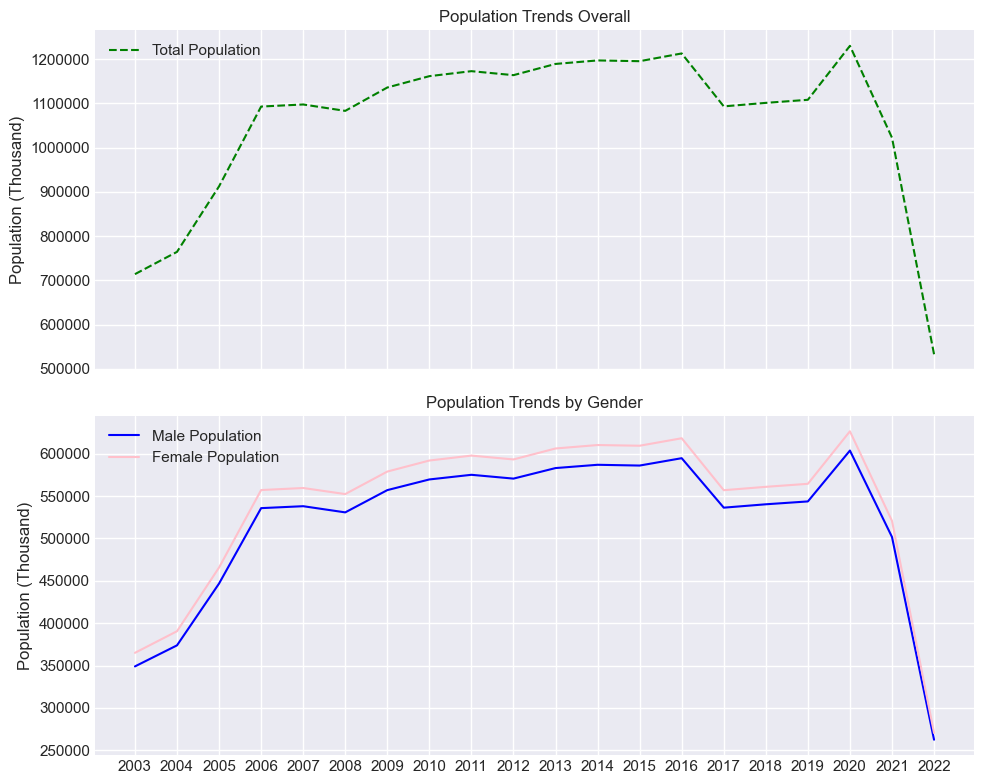

In [414]:

# Get Population by country and year (a fixed number so using mean() will return the fixed number) then sum population by year and visualize it
years_all = df_final.groupby(by=["Country","Year"])["PopTotal"].mean().reset_index().groupby("Year")["PopTotal"].sum().reset_index()
years_male = df_final.groupby(by=["Country","Year"])["PopMale"].mean().reset_index().groupby("Year")["PopMale"].sum().reset_index()
years_female = df_final.groupby(by=["Country","Year"])["PopFemale"].mean().reset_index().groupby("Year")["PopFemale"].sum().reset_index()

# Create a subplot
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Total population
ax[0].plot(years_all["Year"], years_all["PopTotal"], label="Total Population", color="green", linestyle="--")
ax[0].set(ylabel="Population (Thousand)",title="Population Trends Overall")
ax[0].legend()
ax[0].ticklabel_format(style='plain')  

# Male and Female populations
ax[1].plot(years_male["Year"], years_male["PopMale"], label="Male Population", color="blue")
ax[1].plot(years_female["Year"], years_female["PopFemale"], label="Female Population", color="pink")
ax[1].set(ylabel="Population (Thousand)", title="Population Trends by Gender")
ax[1].legend()
ax[1].ticklabel_format(style='plain')  # Disable scientific notation for y-axis


plt.xticks(ticks=years_all["Year"], labels=years_all["Year"])

# plt.savefig("plot.png", dpi=300)  

plt.tight_layout()
plt.show()

# Brazil was not in 2021 and then a lot of countries in 2020 

(This only presents the available data and not worldwide population data)

The huge drop in 2020 immediately stands out. Upon checking the data, there are significantly fewer observations for the number of countries in 2021 and 2022 compared to previous years, which explains this drop. Two possible reasons for this are:

1. Some countries may have reported incomplete data due to the COVID-19 pandemic.
2. During the data wrangling phase, a number of these countries were filtered out for the purpose of this analysis.


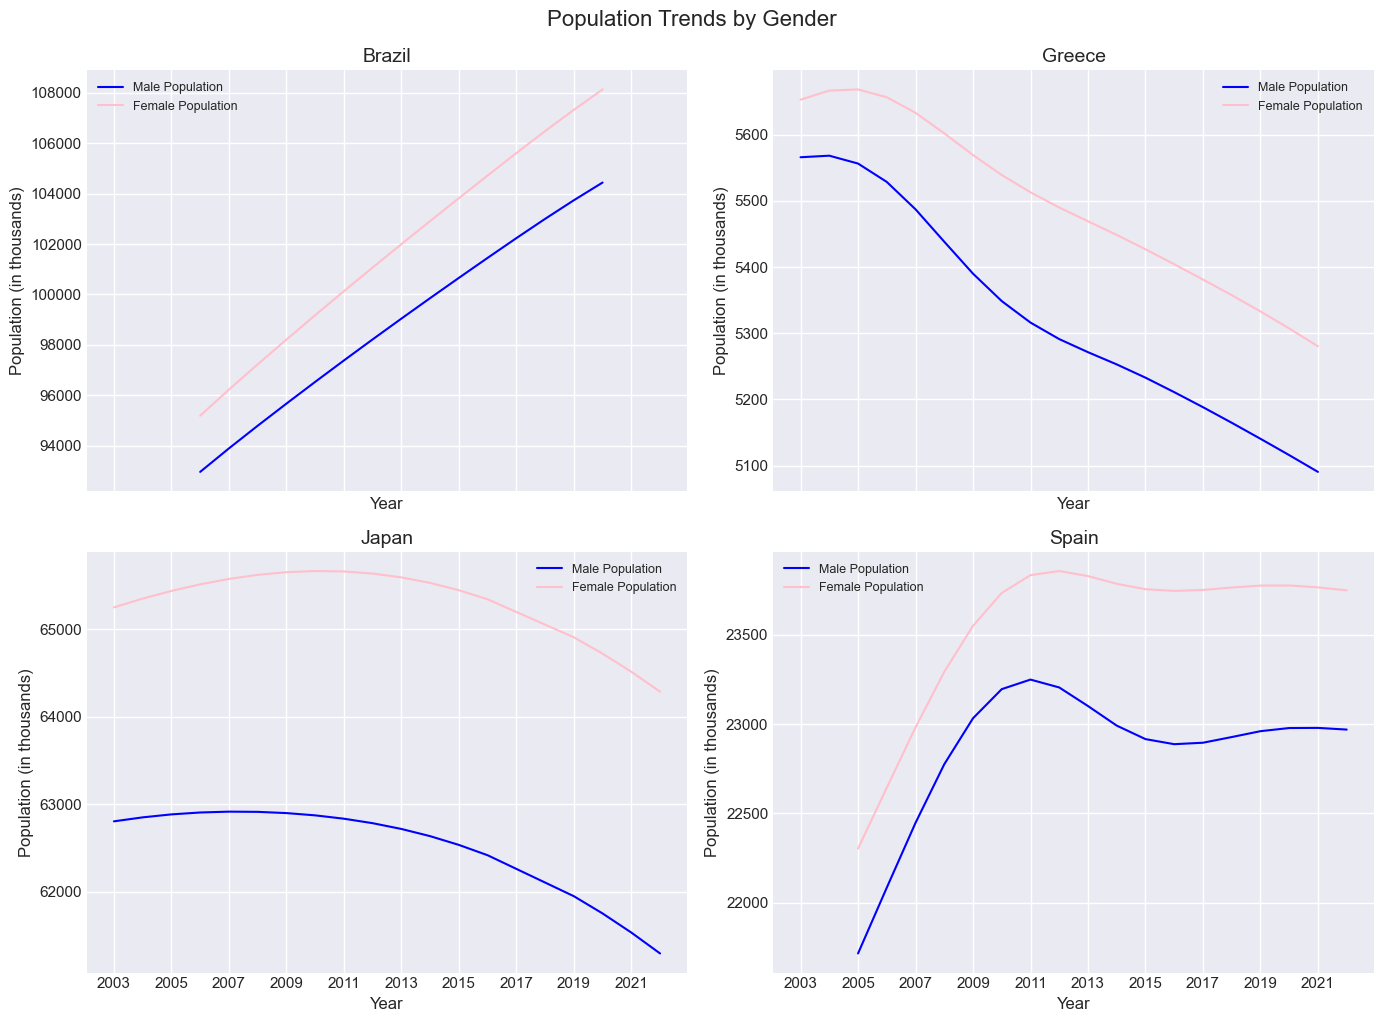

In [415]:
# Verify if the pattern where the male and female population moves together, happening across different countries 

year_male_female_filtered = df_final.groupby(by=["Country","Year"])[["PopMale","PopFemale"]].mean().reset_index()
year_male_female_filtered = year_male_female_filtered[year_male_female_filtered["Country"].isin(["Brazil","Spain","Japan","Greece"])]

# Create subplots 
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Iterate through countries and subplots
for ax, country in zip(axes.flatten(), list(year_male_female_filtered["Country"].unique())):
    country_data = year_male_female_filtered[year_male_female_filtered["Country"] == country]  
    
    ax.plot(
        country_data["Year"],
        country_data["PopMale"],
        label="Male Population",
        color="blue",
        linestyle='-',
    )
    ax.plot(
        country_data["Year"],
        country_data["PopFemale"],
        label="Female Population",
        color="pink",
        linestyle='-',
    )
    
    # Add titles and labels
    ax.set_title(country, fontsize=14)
    ax.set_xlabel("Year")
    ax.set_ylabel("Population (in thousands)")
    ax.legend(fontsize=9)

plt.xticks(range(int(year_male_female_filtered["Year"].min()), int(year_male_female_filtered["Year"].max()) + 1, 2))  # Show every 2 years

plt.xticks(range(int(year_male_female_filtered["Year"].min()), int(year_male_female_filtered["Year"].max()) + 1, 2))  # Show every 2 years
plt.tight_layout()
plt.suptitle("Population Trends by Gender", fontsize=16, y=1.02)

# plt.savefig("plot.png", dpi=300)  

plt.show()

However, what we can take away from this (in our data) is that male and female populations move in parallel, and the number of females is almost always higher in all the years, and this is true across different countries.

<div style="text-align: center; font-weight: bold;font-size: 22px">#2 Male to Female Ratio Distribution</div>

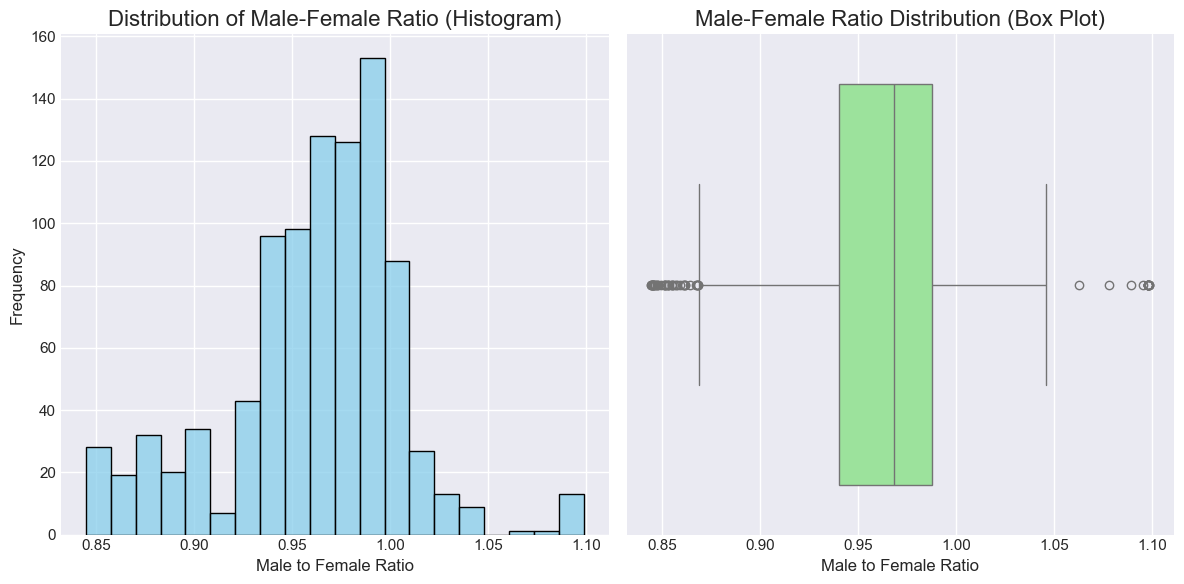

In [416]:
# Group the data by "Country" and "Year" and return Male to Female Ratio for each group (a fixed number so using mean() will return the fixed number)
MF_ratio_country_year = df_final.groupby(by=["Country", "Year"])["Male_Female_Ratio"].mean().reset_index()

# Create the histogram
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1)  
sns.histplot(data=MF_ratio_country_year, x="Male_Female_Ratio", color='skyblue', bins=20, edgecolor='black')

# Add labels and title for the histogram
plt.title('Distribution of Male-Female Ratio (Histogram)', fontsize=16)
plt.xlabel('Male to Female Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Create the box plot
plt.subplot(1, 2, 2)  # Second subplot for the box plot
sns.boxplot(data=MF_ratio_country_year, x="Male_Female_Ratio", color='lightgreen')

# Add labels and title for the box plot
plt.title('Male-Female Ratio Distribution (Box Plot)', fontsize=16)
plt.xlabel('Male to Female Ratio', fontsize=12)

# plt.savefig("plot.png", dpi=300)  

plt.tight_layout()
plt.show()


The male-to-female distribution across the countries and years is normally distributed:

| Statistic | Value      |
|-----------|------------|
| Mean      | 0.961216   |
| Min       | 0.844658   |
| Max       | 1.098603   |

Let’s examine the lower end (< 0.86) and the higher end (> 1.03) observations:

| Country    | Label            | Occurrences |
|------------|------------------|-------------|
| Latvia     | Very low MF Ratio | 19          |
| Lithuania  | Very low MF Ratio | 11          |
| Singapore  | Very high MF Ratio| 17          |
| Albania    | Very high MF Ratio| 9           |

We will target these countries later to see if anything stands out.

---

In general, this is not as extreme as we would have hoped, and a more extreme distribution might better reflect the effects on crime rates. However, we could break it down by the male-to-female ratio by age groups.


In [417]:
# Check counties with very high and low MF ratios and counts that happened across the years 
lower_end = MF_ratio_country_year[MF_ratio_country_year["Male_Female_Ratio"] < 0.86]
higher_end = MF_ratio_country_year[MF_ratio_country_year["Male_Female_Ratio"] > 1.03]

# Add a column for the label ("lower end" or "higher end")
lower_end['Label'] = 'Very low MF Ratio'
higher_end['Label'] = 'Very high MF Ratio'

# Concatenate the two dataframes
combined_df = pd.concat([lower_end[['Country', 'Label']], higher_end[['Country', 'Label']]])
combined_df.groupby(by=["Country", "Label"])["Label"].count().to_frame().rename(columns={"Label":"Count"}).reset_index().sort_values(by=["Label","Count"],ascending=False)

,Country,Label,Count
1,Latvia,Very low MF Ratio,19
2,Lithuania,Very low MF Ratio,11
3,Singapore,Very high MF Ratio,17
0,Albania,Very high MF Ratio,9


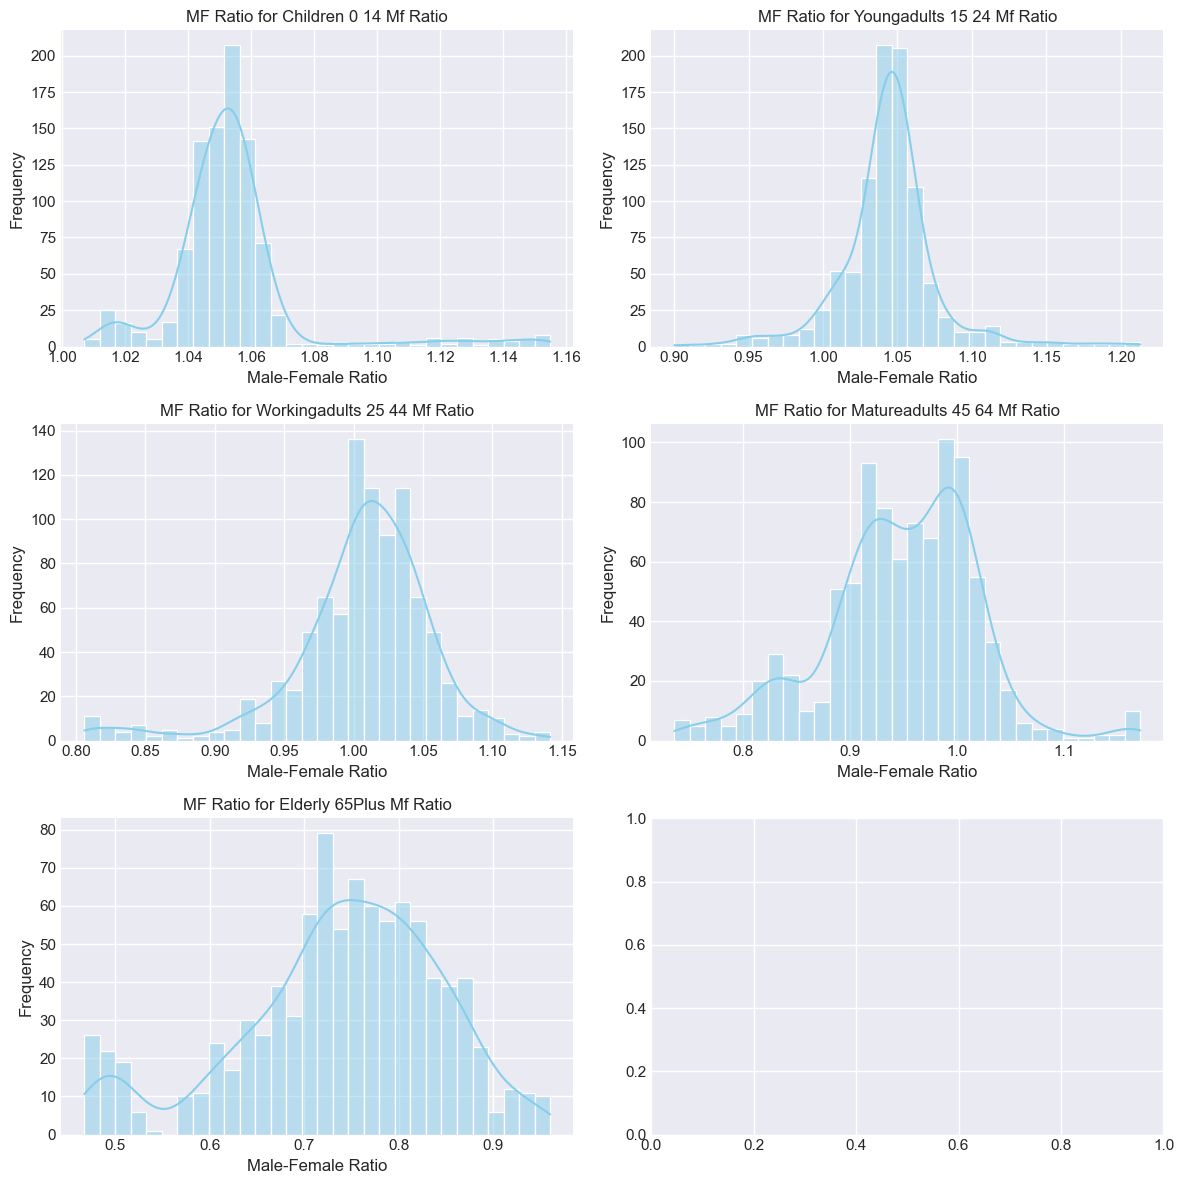

In [418]:
# Histogram bu MF ratio for all ages group

# List of age groups
age_groups = [
    "Children_0_14_MF_Ratio",
    "YoungAdults_15_24_MF_Ratio",
    "WorkingAdults_25_44_MF_Ratio",
    "MatureAdults_45_64_MF_Ratio",
    "Elderly_65Plus_MF_Ratio"
]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes = axes.flatten()

for i, age_group in enumerate(age_groups):
    mf_ratio_age_group = df_final.groupby(by=["Country", "Year"])[age_group].mean().reset_index()

    sns.histplot(mf_ratio_age_group[age_group], kde=True, bins=30, ax=axes[i], color='skyblue')
    
    # Set the title and labels
    axes[i].set_title(f'MF Ratio for {age_group.replace("_", " ").title()}')
    axes[i].set_xlabel('Male-Female Ratio')
    axes[i].set_ylabel('Frequency')

# plt.savefig("plot.png", dpi=300)  

plt.tight_layout()
plt.show()



Male-to-Female Ratio in Different Age Groups

For the age groups **Children (0-14)** and **Elderly (65+)**, the story is different:

- In the **0-14 age group**, the male-to-female ratio is higher than 1, meaning there are more males.
- In the **65+ age group**, there are more females, as the male-to-female ratio is less than 1.

Key Observations:
1. It appears that, in general, there are more males at birth than females.
2. The higher number of females than males in the 65+ group supports the longer life expectancy of women compared to men.


For the groups (Young Adults 15-24), (Working Adults 25–44), and (Mature Adults 45–64), the distribution is normal. However, we see more extreme observations, particularly in one of the targeted age groups, Young Adults (15-24). This stage often involves biological factors such as hormonal changes, competition, which may contribute to increased aggression

<div style="text-align: center; font-weight: bold;font-size: 22px">#3 Male to Female Ratio Distribution (By Region)</div>

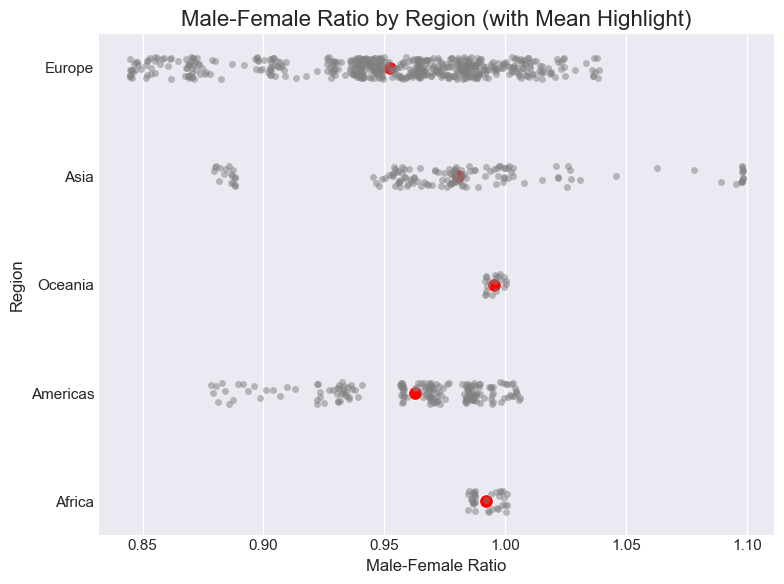

In [419]:
# MF Ratio by Region

# Remove duplicates by country and year
df_region_unique = df_final.drop_duplicates(subset=['Country', 'Year'])

# Group by region and calculate the mean Male_Female_Ratio
region_mean_ratio = df_region_unique.groupby('Region')['Male_Female_Ratio'].mean().to_frame().reset_index().sort_values(by="Male_Female_Ratio",ascending=False)

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(y='Region', x='Male_Female_Ratio', data=df_region_unique, color='gray', alpha=0.5, ax=ax)
sns.scatterplot(y='Region', x='Male_Female_Ratio', data=region_mean_ratio, color='red', s=100, ax=ax)

ax.set_title('Male-Female Ratio by Region (with Mean Highlight)', fontsize=16)
ax.set_xlabel('Male-Female Ratio', fontsize=12)
ax.set_ylabel('Region', fontsize=12)

# plt.savefig("plot.png", dpi=300)  


plt.tight_layout()
plt.show()

We notice that for Oceania and Africa, we have fewer observations, and these are almost not distributed compared to other regions. Upon investigating the reason, we find that for Africa, there are only two countries in the data, and for Oceania, it is only represented by Australia. For Asia, the distribution is interesting, as some observations are disconnected from the center

Let's examine this more by looking at the subregion male-to-female ratio


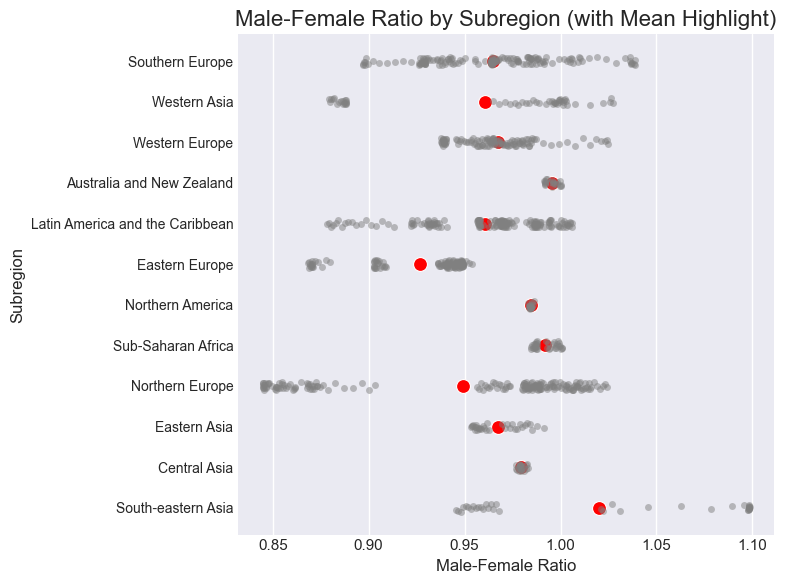

In [420]:
# MF Ratio by Subregion

# Remove duplicates by country and year
df_Subregion_unique = df_final.drop_duplicates(subset=['Country', 'Year'])

# Group by region and calculate the mean Male_Female_Ratio
Subregion_mean_ratio = df_Subregion_unique.groupby('Subregion')['Male_Female_Ratio'].mean().to_frame().reset_index().sort_values(by="Male_Female_Ratio",ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(y='Subregion', x='Male_Female_Ratio', data=df_Subregion_unique, color='gray', alpha=0.5, ax=ax)
sns.scatterplot(y='Subregion', x='Male_Female_Ratio', data=Subregion_mean_ratio, color='red', s=100, ax=ax)

ax.set_title('Male-Female Ratio by Subregion (with Mean Highlight)', fontsize=16)
ax.set_xlabel('Male-Female Ratio', fontsize=12)
ax.set_ylabel('Subregion', fontsize=12)

ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')

plt.show()


A few more disconnections appear in Western Asia, Northern Europe, Eastern Europe, and Southeastern Asia. We will keep this in mind going forward.

<div style="text-align: center; font-weight: bold;font-size: 22px">#4 Zooming in: How is Armenia doing (2003 – 2019)?</div>

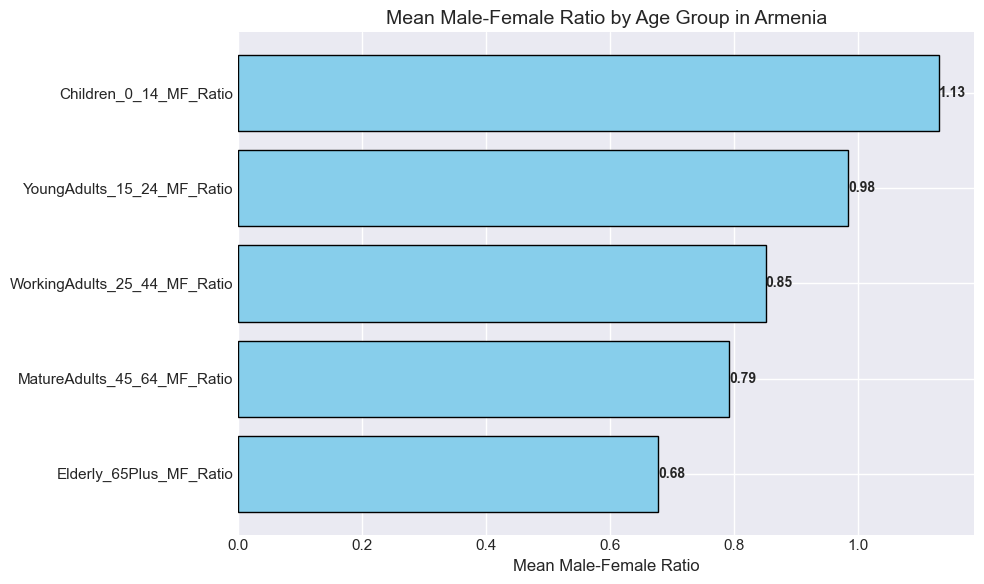

In [421]:
# Filter data for Armenia with Male_Female_Ratio < 0.9 in Western Asia
armenia_data = df_Subregion_unique[df_Subregion_unique["Country"] == "Armenia"]

# List of age groups to calculate the mean Male_Female_Ratio for
age_groups = [
    "Children_0_14_MF_Ratio", 
    "YoungAdults_15_24_MF_Ratio", 
    "WorkingAdults_25_44_MF_Ratio", 
    "MatureAdults_45_64_MF_Ratio", 
    "Elderly_65Plus_MF_Ratio"
]

# Calculate the mean for each of the age groups
mean_ratios = armenia_data[age_groups].mean().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(mean_ratios.index, mean_ratios.values, color='skyblue', edgecolor='black')

# Adding data labels
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}",  
        va='center', 
        ha='left', 
        fontsize=10, 
        fontweight='bold'
    )

plt.title('Mean Male-Female Ratio by Age Group in Armenia', fontsize=14)
plt.xlabel('Mean Male-Female Ratio', fontsize=12)
plt.ylabel(None, fontsize=12)

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


This is Armenia, a country that from 2003 to 2019 has low spending on education as a percentage of total GDP compared to other countries in the dataset, more of a high-density country.

More males at birth, and as we move to older age groups, it keeps decreasing, immigration, death, and what else? Let’s see how the young adults are doing when almost the male-to-female ratio is equal in such a harsh economic environment.

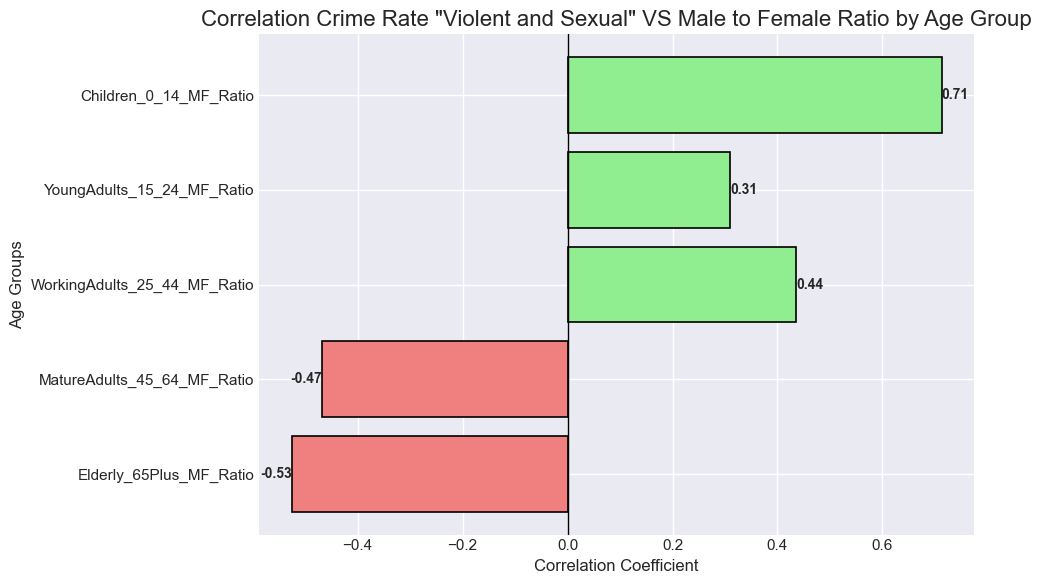

In [422]:
# Armenia data
armenia_data_all = df_final[df_final["Country"] == "Armenia"]

# Filter the data for Violent and Sexual Indicator
violent_sexual_data = armenia_data_all[armenia_data_all['Indicator'] == 'Violent and Sexual']

# Group by Country and Year, calculating the mean of Crime_rate_per_100000_population for Violent and Sexual
crime_rate_mean_violent_sexual = violent_sexual_data.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

armenia_data_unique = armenia_data_all.drop_duplicates(subset=["Year"])

# Merge the datasets for Violent and Sexual
violent_sexual_merged = pd.merge(crime_rate_mean_violent_sexual, armenia_data_unique[['Country', 'Year', 
                                                                                 'YoungAdults_15_24_MF_Ratio',
                                                                                 'Children_0_14_MF_Ratio', 
                                                                                 'WorkingAdults_25_44_MF_Ratio',
                                                                                 'MatureAdults_45_64_MF_Ratio', 
                                                                                 'Elderly_65Plus_MF_Ratio']],
                                 on=['Country', 'Year'])

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = violent_sexual_merged[['Crime_rate_per_100000_population', 'Children_0_14_MF_Ratio', 
                                     'YoungAdults_15_24_MF_Ratio', 'WorkingAdults_25_44_MF_Ratio',
                                     'MatureAdults_45_64_MF_Ratio', 'Elderly_65Plus_MF_Ratio']].corr()

# Keep only the correlation between crime rate and the age group ratios
crime_rate_corr = corr_matrix.loc['Crime_rate_per_100000_population', :]

# Create a new dataframe for visualization
corr_data = crime_rate_corr.drop('Crime_rate_per_100000_population')

desired_order = [ 'Elderly_65Plus_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio',
                 'WorkingAdults_25_44_MF_Ratio',
                 'YoungAdults_15_24_MF_Ratio',
                  'Children_0_14_MF_Ratio']

# Sort correlations for better visualization
corr_data_sorted = corr_data[desired_order]

# Define light colors for positive and negative correlations
colors = corr_data_sorted.apply(lambda x: 'lightgreen' if x > 0 else 'lightcoral')

plt.figure(figsize=(10, 6))
bars = plt.barh(corr_data_sorted.index, corr_data_sorted.values, color=colors, edgecolor='black', linewidth=1.2)

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}",  # Format the label to 2 decimal places
        va='center',
        ha='left' if bar.get_width() > 0 else 'right',  # Position labels based on bar direction
        fontsize=10,
        fontweight='bold'
    )

# Add a vertical line at 0
plt.axvline(0, color='black', linewidth=1)

plt.title('Correlation Crime Rate "Violent and Sexual" VS Male to Female Ratio by Age Group', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


This is very promising and supports our hypothesis. As Armenia’s population ages, the positive correlation between the male-to-female ratio and the rate of violent and sexual crimes decreases. However, correlation does not imply causation, and the correlation for the children group appears to be an outlier. For now, we do not know what is causing the high correlation.




One last interesting observation before leaving Armenia: on average, for every sexual and violent crime that occurs, 40 corruption and economic crimes are committed (which is understandable).     


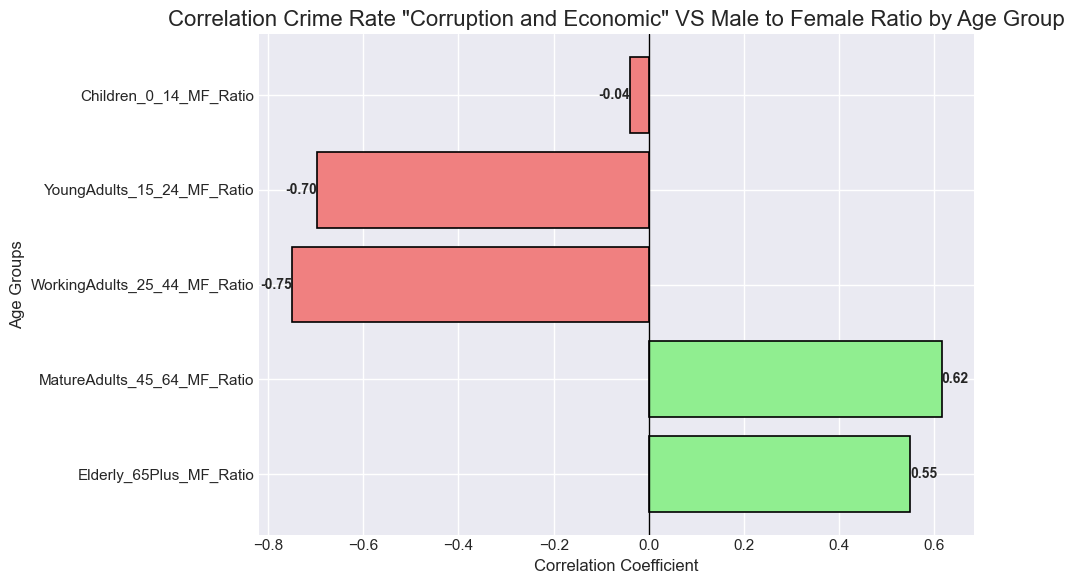

In [423]:
# Armenia data
armenia_data_all = df_final[df_final["Country"] == "Armenia"]

# Filter the data for Violent and Sexual Indicator
Corruption_and_Economic_data = armenia_data_all[armenia_data_all['Indicator'] == 'Corruption and Economic']

# Group by Country and Year, calculating the mean of Crime_rate_per_100000_population for Violent and Sexual
Corruption_and_Economic_sexual = Corruption_and_Economic_data.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

armenia_data_unique = armenia_data_all.drop_duplicates(subset=["Year"])

# Merge the datasets for Violent and Sexual
Corruption_and_Economi_merged = pd.merge(Corruption_and_Economic_sexual, armenia_data_unique[['Country', 'Year', 
                                                                                 'YoungAdults_15_24_MF_Ratio',
                                                                                 'Children_0_14_MF_Ratio', 
                                                                                 'WorkingAdults_25_44_MF_Ratio',
                                                                                 'MatureAdults_45_64_MF_Ratio', 
                                                                                 'Elderly_65Plus_MF_Ratio']],
                                 on=['Country', 'Year'])

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = Corruption_and_Economi_merged[['Crime_rate_per_100000_population', 'Children_0_14_MF_Ratio', 
                                     'YoungAdults_15_24_MF_Ratio', 'WorkingAdults_25_44_MF_Ratio',
                                     'MatureAdults_45_64_MF_Ratio', 'Elderly_65Plus_MF_Ratio']].corr()

# Keep only the correlation between crime rate and the age group ratios
crime_rate_corr = corr_matrix.loc['Crime_rate_per_100000_population', :]

# Create a new dataframe for visualization
corr_data = crime_rate_corr.drop('Crime_rate_per_100000_population')

desired_order = [ 'Elderly_65Plus_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio',
                 'WorkingAdults_25_44_MF_Ratio',
                 'YoungAdults_15_24_MF_Ratio',
                  'Children_0_14_MF_Ratio']


# Sort correlations for better visualization
corr_data_sorted = corr_data[desired_order]

# Define light colors for positive and negative correlations
colors = corr_data_sorted.apply(lambda x: 'lightgreen' if x > 0 else 'lightcoral')

plt.figure(figsize=(10, 6))
bars = plt.barh(corr_data_sorted.index, corr_data_sorted.values, color=colors, edgecolor='black', linewidth=1.2)

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}",  # Format the label to 2 decimal places
        va='center',
        ha='left' if bar.get_width() > 0 else 'right',  # Position labels based on bar direction
        fontsize=10,
        fontweight='bold'
    )

# Add a vertical line at 0
plt.axvline(0, color='black', linewidth=1)

plt.title('Correlation Crime Rate "Corruption and Economic" VS Male to Female Ratio by Age Group', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


Now the pattern is quite different: show a positive correlation between the male-to-female ratio and corruption crimes, older people, being more rational and 'wiser,' but physically less capable than the younger generation, show a positive correlation between the male-to-female ratio and corruption crimes

<div style="text-align: center; font-weight: bold;font-size: 22px">#5 Zooming out: Crimes Overview</div>

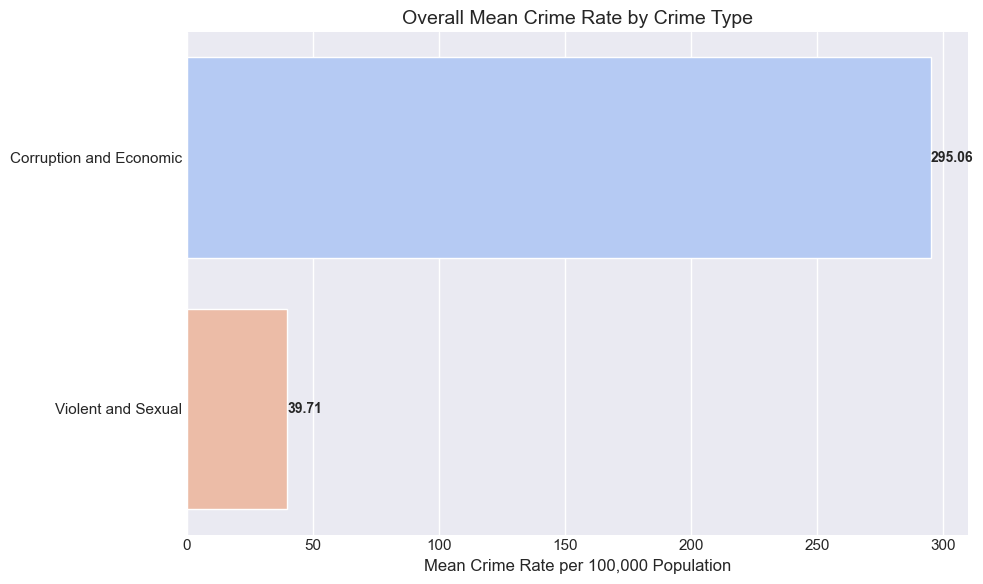

In [424]:
# Calculate the mean crime rate for each 'Indicator'
indicator_means = df_final.groupby('Indicator')['Crime_rate_per_100000_population'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=indicator_means.values, y=indicator_means.index, palette='coolwarm')

# Add data labels
for i, v in enumerate(indicator_means.values):
    ax.text(v + 0.1, i, f'{v:.2f}', va='center', ha='left', fontsize=10, fontweight='bold')

plt.xlabel('Mean Crime Rate per 100,000 Population', fontsize=12)
plt.ylabel(None)
plt.title('Overall Mean Crime Rate by Crime Type', fontsize=14)

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


Corruption and economic crimes are much more frequent than violent and sexual crimes. This might be true in general, or it could be related to reporting issues and the subset of countries and years available in the dataset

Let’s examine how each category correlates with the male-to-female ratio.


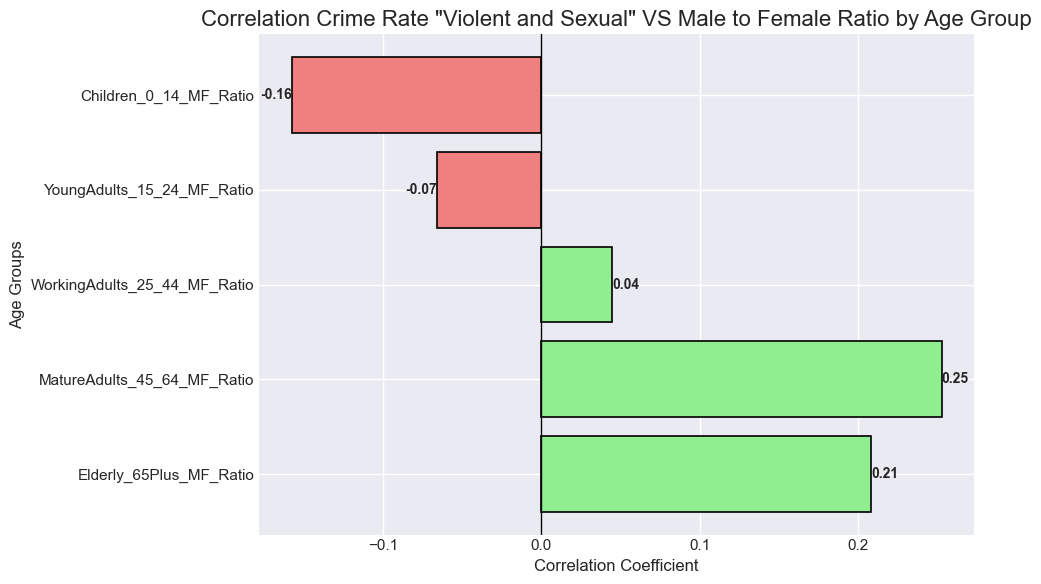

In [425]:
# Filter the data for Violent and Sexual Indicator
violent_sexual_data = df_final[df_final['Indicator'] == 'Violent and Sexual']

# Group by Country and Year, calculating the mean of Crime_rate_per_100000_population for Violent and Sexual
crime_rate_mean_violent_sexual = violent_sexual_data.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

data_unique = df_final.drop_duplicates(subset=["Country","Year"])

# Merge the datasets for Violent and Sexual
violent_sexual_merged = pd.merge(crime_rate_mean_violent_sexual, data_unique[['Country', 'Year', 
                                                                                 'YoungAdults_15_24_MF_Ratio',
                                                                                 'Children_0_14_MF_Ratio', 
                                                                                 'WorkingAdults_25_44_MF_Ratio',
                                                                                 'MatureAdults_45_64_MF_Ratio', 
                                                                                 'Elderly_65Plus_MF_Ratio','Male_Female_Ratio']],
                                 on=['Country', 'Year'])

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = violent_sexual_merged[['Crime_rate_per_100000_population', 'Children_0_14_MF_Ratio', 
                                     'YoungAdults_15_24_MF_Ratio', 'WorkingAdults_25_44_MF_Ratio',
                                     'MatureAdults_45_64_MF_Ratio', 'Elderly_65Plus_MF_Ratio']].corr()

# Keep only the correlation between crime rate and the age group ratios
crime_rate_corr = corr_matrix.loc['Crime_rate_per_100000_population', :]

# Create a new dataframe for visualization
corr_data = crime_rate_corr.drop('Crime_rate_per_100000_population')

desired_order = [ 'Elderly_65Plus_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio',
                 'WorkingAdults_25_44_MF_Ratio',
                 'YoungAdults_15_24_MF_Ratio',
                  'Children_0_14_MF_Ratio']

# Sort correlations for better visualization
corr_data_sorted = corr_data[desired_order]

# Define light colors for positive and negative correlations
colors = corr_data_sorted.apply(lambda x: 'lightgreen' if x > 0 else 'lightcoral')

plt.figure(figsize=(10, 6))
bars = plt.barh(corr_data_sorted.index, corr_data_sorted.values, color=colors, edgecolor='black', linewidth=1.2)

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}",  # Format the label to 2 decimal places
        va='center',
        ha='left' if bar.get_width() > 0 else 'right',  # Position labels based on bar direction
        fontsize=10,
        fontweight='bold'
    )

# Add a vertical line at 0
plt.axvline(0, color='black', linewidth=1)

plt.title('Correlation Crime Rate "Violent and Sexual" VS Male to Female Ratio by Age Group', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


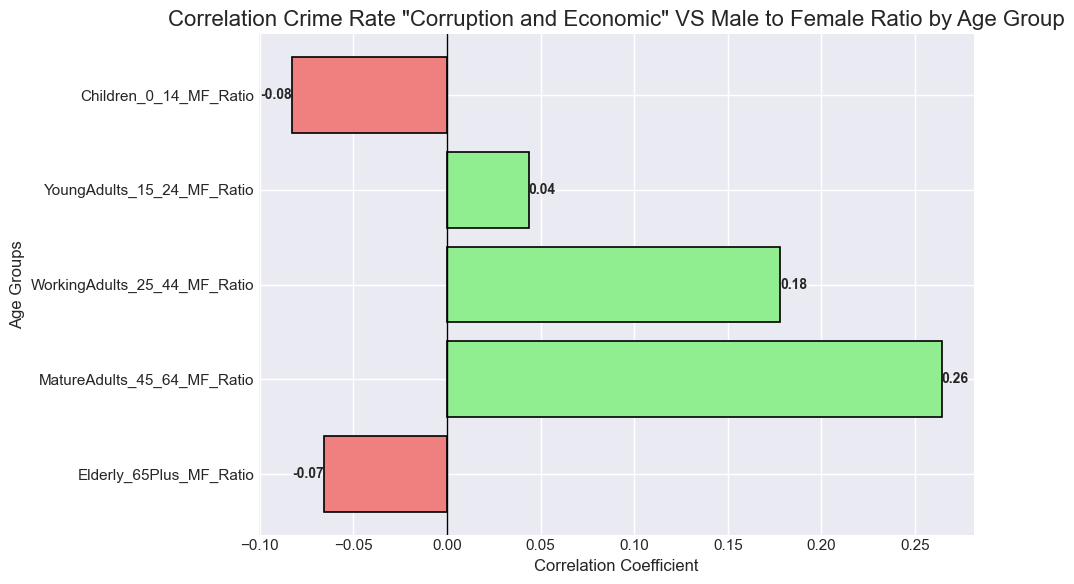

In [426]:

#Filter the data for Violent and Sexual Indicator
Corruption_and_Economic_data = df_final[df_final['Indicator'] == 'Corruption and Economic']

# Group by Country and Year, calculating the mean of Crime_rate_per_100000_population for Violent and Sexual
crime_rate_mean_Corruption_and_Economic = Corruption_and_Economic_data.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

data_unique = df_final.drop_duplicates(subset=["Country","Year"])

# Merge the datasets for Violent and Sexual
Corruption_and_Economic_merged = pd.merge(crime_rate_mean_Corruption_and_Economic, data_unique[['Country', 'Year', 
                                                                                 'YoungAdults_15_24_MF_Ratio',
                                                                                 'Children_0_14_MF_Ratio', 
                                                                                 'WorkingAdults_25_44_MF_Ratio',
                                                                                 'MatureAdults_45_64_MF_Ratio', 
                                                                                 'Elderly_65Plus_MF_Ratio','Male_Female_Ratio']],
                                 on=['Country', 'Year'])

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = Corruption_and_Economic_merged[['Crime_rate_per_100000_population', 'Children_0_14_MF_Ratio', 
                                     'YoungAdults_15_24_MF_Ratio', 'WorkingAdults_25_44_MF_Ratio',
                                     'MatureAdults_45_64_MF_Ratio', 'Elderly_65Plus_MF_Ratio']].corr()

# Keep only the correlation between crime rate and the age group ratios
crime_rate_corr = corr_matrix.loc['Crime_rate_per_100000_population', :]

# Create a new dataframe for visualization
corr_data = crime_rate_corr.drop('Crime_rate_per_100000_population')

desired_order = [ 'Elderly_65Plus_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio',
                 'WorkingAdults_25_44_MF_Ratio',
                 'YoungAdults_15_24_MF_Ratio',
                  'Children_0_14_MF_Ratio']

# Sort correlations for better visualization
corr_data_sorted = corr_data[desired_order]

# Define light colors for positive and negative correlations
colors = corr_data_sorted.apply(lambda x: 'lightgreen' if x > 0 else 'lightcoral')

plt.figure(figsize=(10, 6))
bars = plt.barh(corr_data_sorted.index, corr_data_sorted.values, color=colors, edgecolor='black', linewidth=1.2)

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}",  # Format the label to 2 decimal places
        va='center',
        ha='left' if bar.get_width() > 0 else 'right',  # Position labels based on bar direction
        fontsize=10,
        fontweight='bold'
    )

# Add a vertical line at 0
plt.axvline(0, color='black', linewidth=1)

plt.title('Correlation Crime Rate "Corruption and Economic" VS Male to Female Ratio by Age Group', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


These numbers and variations indicate that there is some kind of correlation between the male-to-female ratio and crimes. However, it is neither consistent nor significant. This is likely due to multiple factors influencing this relationship, such as culture, laws, economics, and more.



It’s time to zoom in, and visit Southern Europe!


<div style="text-align: center; font-weight: bold;font-size: 22px">#6 Zooming in: Southern Europe </div>

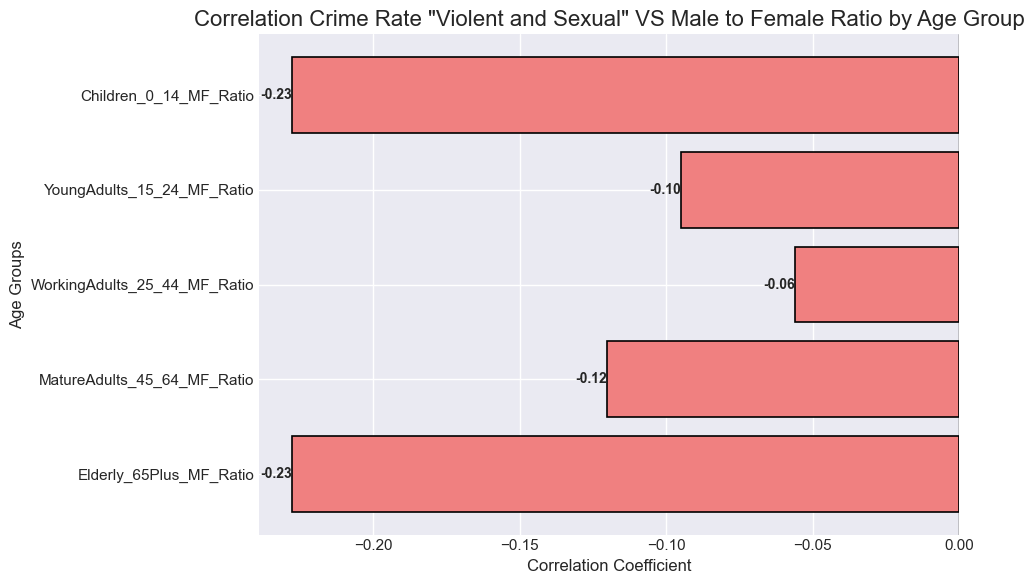

In [427]:
# Filter the data for Southern Europe
Southern_Europe = df_final[df_final["Subregion"] == "Southern Europe"]

# Filter the data for Violent and Sexual Indicator
Southern_Europe_data = df_final[(df_final['Indicator'] == 'Violent and Sexual') & (df_final["Subregion"] == "Southern Europe")]

# Group by Country and Year, calculating the mean of Crime_rate_per_100000_population for Violent and Sexual
crime_rate_mean_Southern_Europe = Southern_Europe_data.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

data_unique = Southern_Europe.drop_duplicates(subset=["Country", "Year"])

# Merge the datasets for Violent and Sexual
Southern_Europe_merged = pd.merge(
    crime_rate_mean_Southern_Europe, 
    data_unique[['Country', 'Year', 
                 'YoungAdults_15_24_MF_Ratio',
                 'Children_0_14_MF_Ratio', 
                 'WorkingAdults_25_44_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio', 
                 'Elderly_65Plus_MF_Ratio', 
                 'Male_Female_Ratio']],
    on=['Country', 'Year']
)

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = Southern_Europe_merged[['Crime_rate_per_100000_population', 
                                      'Children_0_14_MF_Ratio', 
                                      'YoungAdults_15_24_MF_Ratio', 
                                      'WorkingAdults_25_44_MF_Ratio',
                                      'MatureAdults_45_64_MF_Ratio', 
                                      'Elderly_65Plus_MF_Ratio']].corr()

# Keep only the correlation between crime rate and the age group ratios
crime_rate_corr = corr_matrix.loc['Crime_rate_per_100000_population', :]

# Create a new dataframe for visualization
corr_data = crime_rate_corr.drop('Crime_rate_per_100000_population')

desired_order = [
    'Elderly_65Plus_MF_Ratio',
    'MatureAdults_45_64_MF_Ratio',
    'WorkingAdults_25_44_MF_Ratio',
    'YoungAdults_15_24_MF_Ratio',
    'Children_0_14_MF_Ratio'
]

# Sort correlations for better visualization
corr_data_sorted = corr_data[desired_order]

# Define light colors for positive and negative correlations
colors = corr_data_sorted.apply(lambda x: 'lightgreen' if x > 0 else 'lightcoral')

plt.figure(figsize=(10, 6))
bars = plt.barh(corr_data_sorted.index, corr_data_sorted.values, color=colors, edgecolor='black', linewidth=1.2)

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}",  # Format the label to 2 decimal places
        va='center',
        ha='left' if bar.get_width() > 0 else 'right',  # Position labels based on bar direction
        fontsize=10,
        fontweight='bold'
    )

# Add a vertical line at 0
plt.axvline(0, color='black', linewidth=1)

plt.title('Correlation Crime Rate "Violent and Sexual" VS Male to Female Ratio by Age Group', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


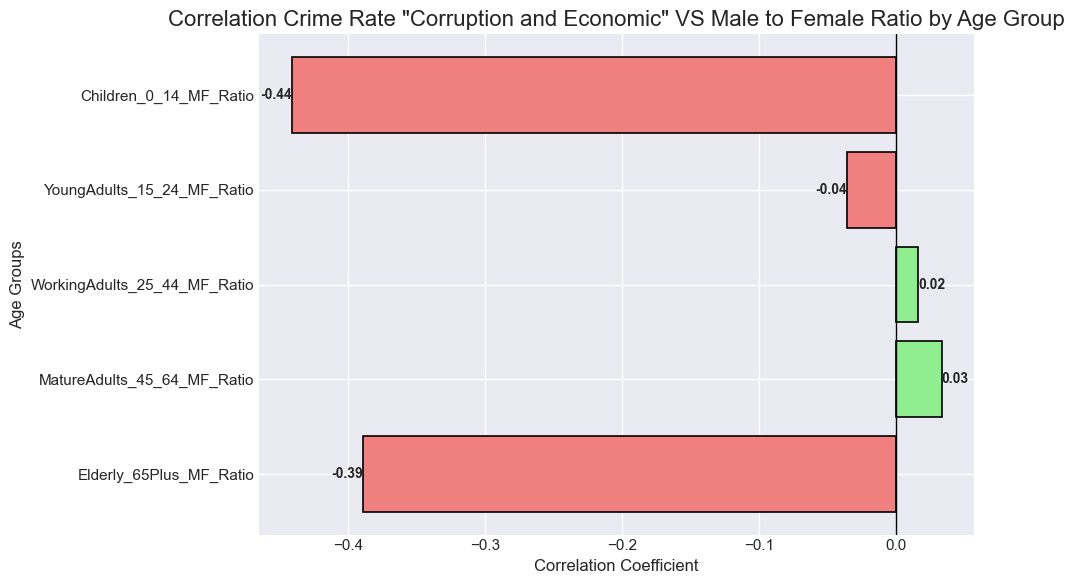

In [428]:
# Filter the data for Southern Europe
Southern_Europe = df_final[df_final["Subregion"] == "Southern Europe"]

# Filter the data for Violent and Sexual Indicator
Southern_Europe_data = df_final[(df_final['Indicator'] == 'Corruption and Economic') & (df_final["Subregion"] == "Southern Europe")]

# Group by Country and Year, calculating the mean of Crime_rate_per_100000_population for Violent and Sexual
crime_rate_mean_Southern_Europe = Southern_Europe_data.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

data_unique = df_final.drop_duplicates(subset=["Country", "Year"])

# Merge the datasets for Violent and Sexual
Southern_Europe_merged = pd.merge(
    crime_rate_mean_Southern_Europe, 
    data_unique[['Country', 'Year', 
                 'YoungAdults_15_24_MF_Ratio',
                 'Children_0_14_MF_Ratio', 
                 'WorkingAdults_25_44_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio', 
                 'Elderly_65Plus_MF_Ratio', 
                 'Male_Female_Ratio']],
    on=['Country', 'Year']
)

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = Southern_Europe_merged[['Crime_rate_per_100000_population', 
                                      'Children_0_14_MF_Ratio', 
                                      'YoungAdults_15_24_MF_Ratio', 
                                      'WorkingAdults_25_44_MF_Ratio',
                                      'MatureAdults_45_64_MF_Ratio', 
                                      'Elderly_65Plus_MF_Ratio']].corr()

# Keep only the correlation between crime rate and the age group ratios
crime_rate_corr = corr_matrix.loc['Crime_rate_per_100000_population', :]

# Create a new dataframe for visualization
corr_data = crime_rate_corr.drop('Crime_rate_per_100000_population')

desired_order = [
    'Elderly_65Plus_MF_Ratio',
    'MatureAdults_45_64_MF_Ratio',
    'WorkingAdults_25_44_MF_Ratio',
    'YoungAdults_15_24_MF_Ratio',
    'Children_0_14_MF_Ratio'
]

# Sort correlations for better visualization
corr_data_sorted = corr_data[desired_order]

# Define light colors for positive and negative correlations
colors = corr_data_sorted.apply(lambda x: 'lightgreen' if x > 0 else 'lightcoral')

plt.figure(figsize=(10, 6))
bars = plt.barh(corr_data_sorted.index, corr_data_sorted.values, color=colors, edgecolor='black', linewidth=1.2)

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}",  # Format the label to 2 decimal places
        va='center',
        ha='left' if bar.get_width() > 0 else 'right',  # Position labels based on bar direction
        fontsize=10,
        fontweight='bold'
    )

# Add a vertical line at 0
plt.axvline(0, color='black', linewidth=1)

plt.title('Correlation Crime Rate "Corruption and Economic" VS Male to Female Ratio by Age Group', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


Presented by 8 different countries, with moderate to high variations in education spending and population density, and a fairly good distribution of the male-to-female ratio across the years and the countries, we might find something interesting.

Surprisingly, the correlation is negative across the different age groups


At this point, we suspect that there is a more powerful factor affecting the crime rates. Let's look at how the crime rate trend looks over the years in Southern Europe

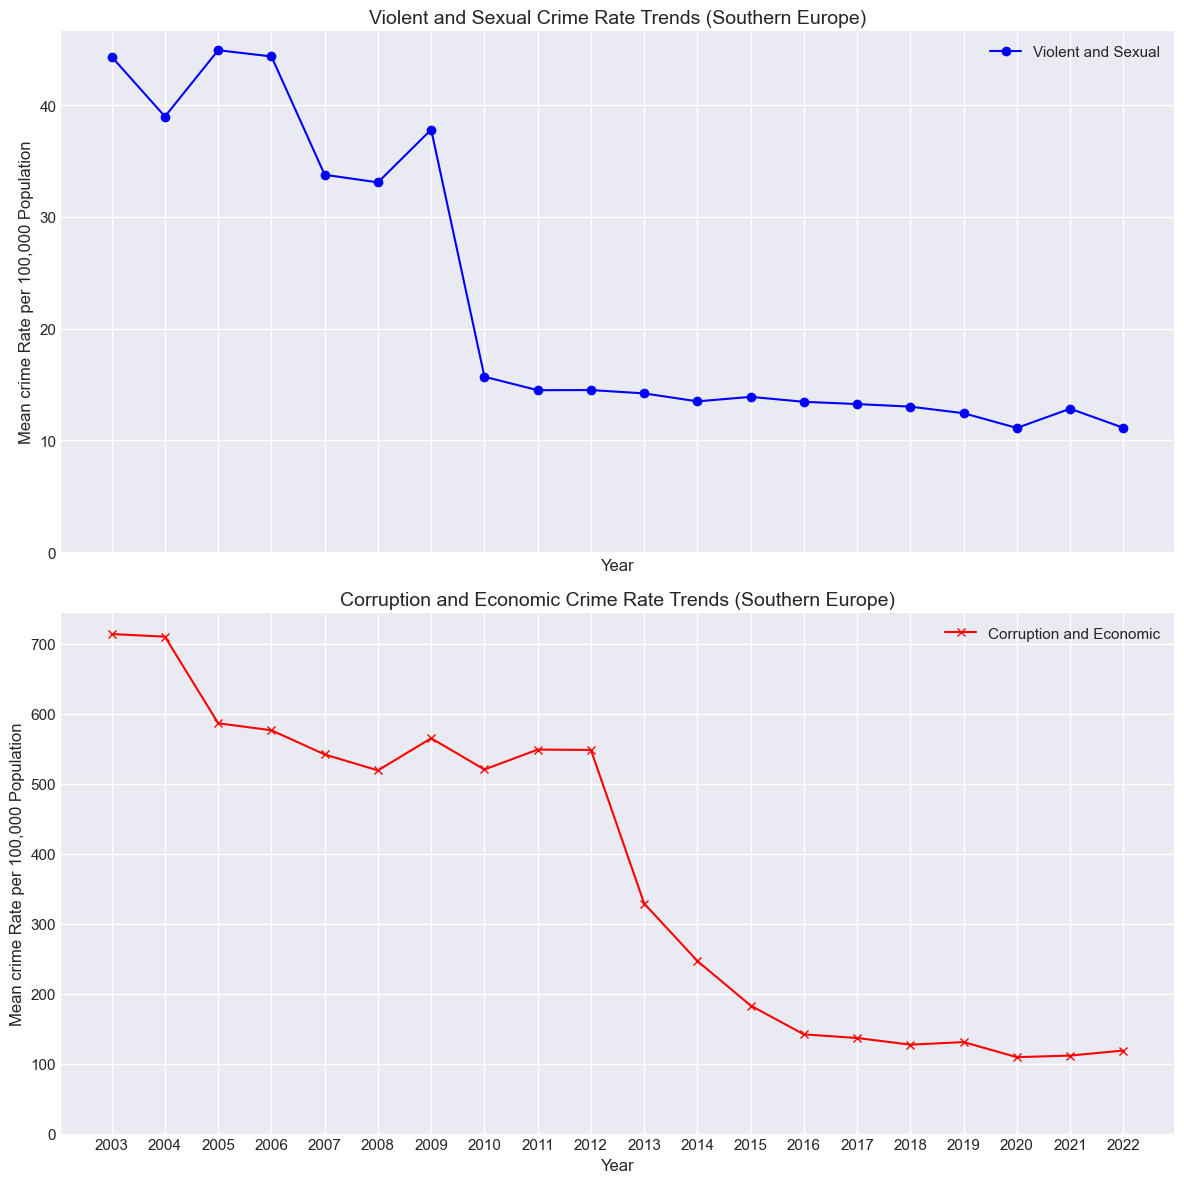

In [429]:
# Filter data for Violent and Sexual Indicator
Southern_Europe_data_violent = df_final[(df_final['Indicator'] == 'Violent and Sexual') & (df_final["Subregion"] == "Southern Europe")]
crime_rate_violent = Southern_Europe_data_violent.groupby(by="Year")["Crime_rate_per_100000_population"].mean()

# Filter data for Corruption and Economic Indicator
Southern_Europe_data_corruption = df_final[(df_final['Indicator'] == 'Corruption and Economic') & (df_final["Subregion"] == "Southern Europe")]
crime_rate_corruption = Southern_Europe_data_corruption.groupby(by="Year")["Crime_rate_per_100000_population"].mean()

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12),sharex=True)

# Plot Crime Rate for Violent and Sexual Indicator in the first subplot
axes[0].plot(crime_rate_violent.index, crime_rate_violent, label='Violent and Sexual', color='blue', marker='o')
axes[0].set_title('Violent and Sexual Crime Rate Trends (Southern Europe)', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Mean crime Rate per 100,000 Population', fontsize=12)
axes[0].grid(True)
axes[0].legend()
axes[0].set_ylim(bottom=0)  


# Plot Crime Rate for Corruption and Economic Indicator in the second subplot
axes[1].plot(crime_rate_corruption.index, crime_rate_corruption, label='Corruption and Economic', color='red', marker='x')
axes[1].set_title('Corruption and Economic Crime Rate Trends (Southern Europe)', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Mean crime Rate per 100,000 Population', fontsize=12)
axes[1].grid(True)
axes[1].legend()
axes[1].set_ylim(bottom=0) 


plt.xticks(ticks=years_all["Year"], labels=years_all["Year"])

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()


There was a huge decrease in the crime rate between 2022 and 2003, -74.92% for violent and sexual crimes and -83.38% for corruption and economic crimes. A significant decrease began entering the 2010s. while the male to female was almost steady and increased for 4.88%.

Time to narrow the analysis and control for some potential factors. We will focus on countries with high population density and low public spending on education as a percentage of GDP compared to other countries in the dataset.


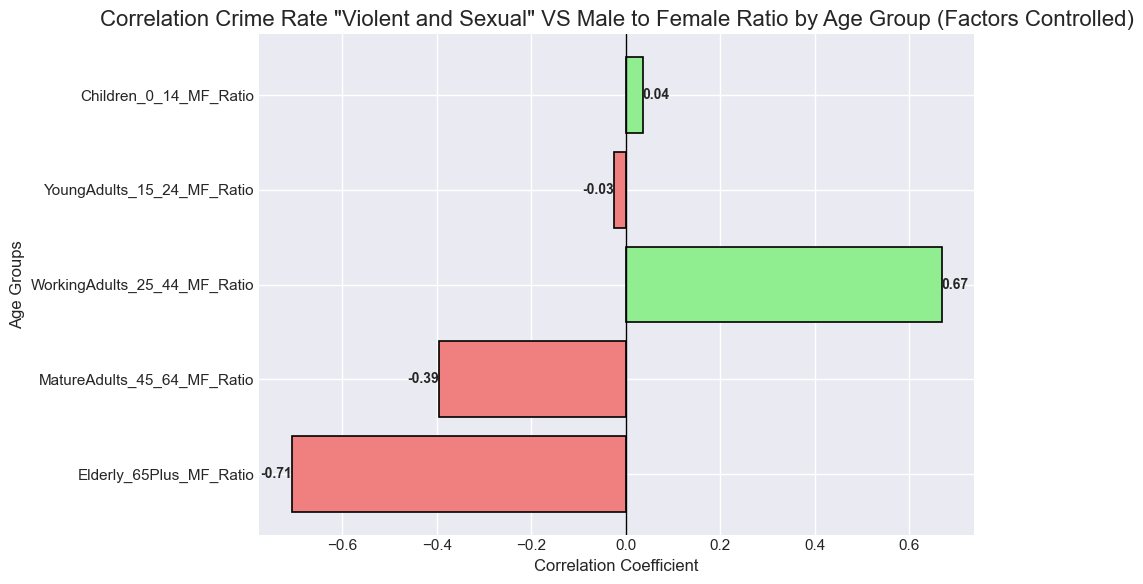

In [430]:

# Filter the data for Violent and Sexual Indicator
Southern_Europe_data_factors = df_final[(df_final['Indicator'] == 'Violent and Sexual') & (df_final["Subregion"] == "Southern Europe")  & (df_final["Density_Label"] == "High Density") & (df_final["Education_Spending_Label"] == "Low Spending")]

# Group by Country and Year, calculating the mean of Crime_rate_per_100000_population for Violent and Sexual
crime_rate_mean_Southern_Europe = Southern_Europe_data_factors.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

data_unique = Southern_Europe.drop_duplicates(subset=["Country", "Year"])

# Merge the datasets for Violent and Sexual
Southern_Europe_merged = pd.merge(
    crime_rate_mean_Southern_Europe, 
    data_unique[['Country', 'Year', 
                 'YoungAdults_15_24_MF_Ratio',
                 'Children_0_14_MF_Ratio', 
                 'WorkingAdults_25_44_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio', 
                 'Elderly_65Plus_MF_Ratio', 
                 'Male_Female_Ratio']],
    on=['Country', 'Year']
)

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = Southern_Europe_merged[['Crime_rate_per_100000_population', 
                                      'Children_0_14_MF_Ratio', 
                                      'YoungAdults_15_24_MF_Ratio', 
                                      'WorkingAdults_25_44_MF_Ratio',
                                      'MatureAdults_45_64_MF_Ratio', 
                                      'Elderly_65Plus_MF_Ratio']].corr()

# Keep only the correlation between crime rate and the age group ratios
crime_rate_corr = corr_matrix.loc['Crime_rate_per_100000_population', :]

# Create a new dataframe for visualization
corr_data = crime_rate_corr.drop('Crime_rate_per_100000_population')

desired_order = [
    'Elderly_65Plus_MF_Ratio',
    'MatureAdults_45_64_MF_Ratio',
    'WorkingAdults_25_44_MF_Ratio',
    'YoungAdults_15_24_MF_Ratio',
    'Children_0_14_MF_Ratio'
]

# Sort correlations for better visualization
corr_data_sorted = corr_data[desired_order]

# Define light colors for positive and negative correlations
colors = corr_data_sorted.apply(lambda x: 'lightgreen' if x > 0 else 'lightcoral')

plt.figure(figsize=(10, 6))
bars = plt.barh(corr_data_sorted.index, corr_data_sorted.values, color=colors, edgecolor='black', linewidth=1.2)

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}",  # Format the label to 2 decimal places
        va='center',
        ha='left' if bar.get_width() > 0 else 'right',  # Position labels based on bar direction
        fontsize=10,
        fontweight='bold'
    )

# Add a vertical line at 0
plt.axvline(0, color='black', linewidth=1)

plt.title('Correlation Crime Rate "Violent and Sexual" VS Male to Female Ratio by Age Group (Factors Controlled)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)

plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


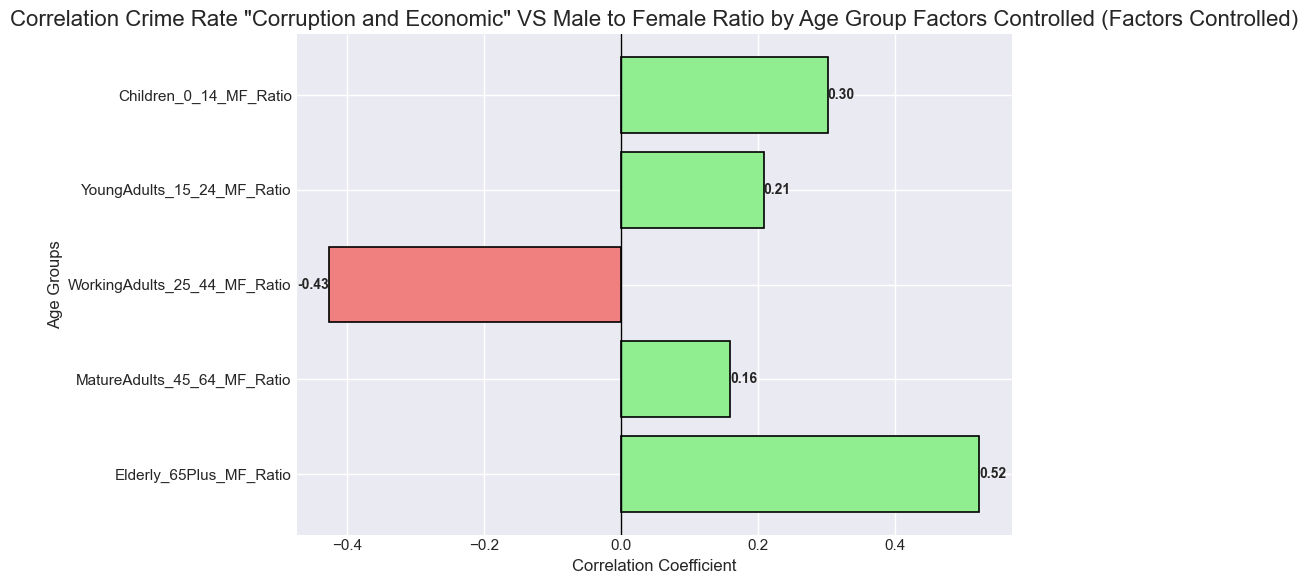

In [431]:

# Filter the data for Violent and Sexual Indicator
Southern_Europe_data_factors = df_final[(df_final['Indicator'] == 'Corruption and Economic') & (df_final["Subregion"] == "Southern Europe") & (df_final["Density_Label"] == "High Density") & (df_final["Education_Spending_Label"] == "Low Spending")]

# Group by Country and Year, calculating the mean of Crime_rate_per_100000_population for Violent and Sexual
crime_rate_mean_Southern_Europe = Southern_Europe_data_factors.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

data_unique = df_final.drop_duplicates(subset=["Country", "Year"])

# Merge the datasets for Violent and Sexual
Southern_Europe_merged = pd.merge(
    crime_rate_mean_Southern_Europe, 
    data_unique[['Country', 'Year', 
                 'YoungAdults_15_24_MF_Ratio',
                 'Children_0_14_MF_Ratio', 
                 'WorkingAdults_25_44_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio', 
                 'Elderly_65Plus_MF_Ratio', 
                 'Male_Female_Ratio']],
    on=['Country', 'Year']
)

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = Southern_Europe_merged[['Crime_rate_per_100000_population', 
                                      'Children_0_14_MF_Ratio', 
                                      'YoungAdults_15_24_MF_Ratio', 
                                      'WorkingAdults_25_44_MF_Ratio',
                                      'MatureAdults_45_64_MF_Ratio', 
                                      'Elderly_65Plus_MF_Ratio']].corr()

# Keep only the correlation between crime rate and the age group ratios
crime_rate_corr = corr_matrix.loc['Crime_rate_per_100000_population', :]

# Create a new dataframe for visualization
corr_data = crime_rate_corr.drop('Crime_rate_per_100000_population')

desired_order = [
    'Elderly_65Plus_MF_Ratio',
    'MatureAdults_45_64_MF_Ratio',
    'WorkingAdults_25_44_MF_Ratio',
    'YoungAdults_15_24_MF_Ratio',
    'Children_0_14_MF_Ratio'
]

# Sort correlations for better visualization
corr_data_sorted = corr_data[desired_order]

# Define light colors for positive and negative correlations
colors = corr_data_sorted.apply(lambda x: 'lightgreen' if x > 0 else 'lightcoral')

plt.figure(figsize=(10, 6))
bars = plt.barh(corr_data_sorted.index, corr_data_sorted.values, color=colors, edgecolor='black', linewidth=1.2)

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}",  # Format the label to 2 decimal places
        va='center',
        ha='left' if bar.get_width() > 0 else 'right',  # Position labels based on bar direction
        fontsize=10,
        fontweight='bold'
    )

# Add a vertical line at 0
plt.axvline(0, color='black', linewidth=1)

plt.title('Correlation Crime Rate "Corruption and Economic" VS Male to Female Ratio by Age Group Factors Controlled (Factors Controlled)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()



Huge shifting, we are talking about (Working adults 25 to 44) being more aggressive and committing violent and sexual crimes, correlating to the male-to-female ratio with 0.67, while other age groups are being aggressive through corruption and economic crimes, but that’s only one country with high density and low spending on education in Southern Europe.

So, does this hold true worldwie?


<div style="text-align: center; font-weight: bold;font-size: 22px">#7 The Big Picture</div>

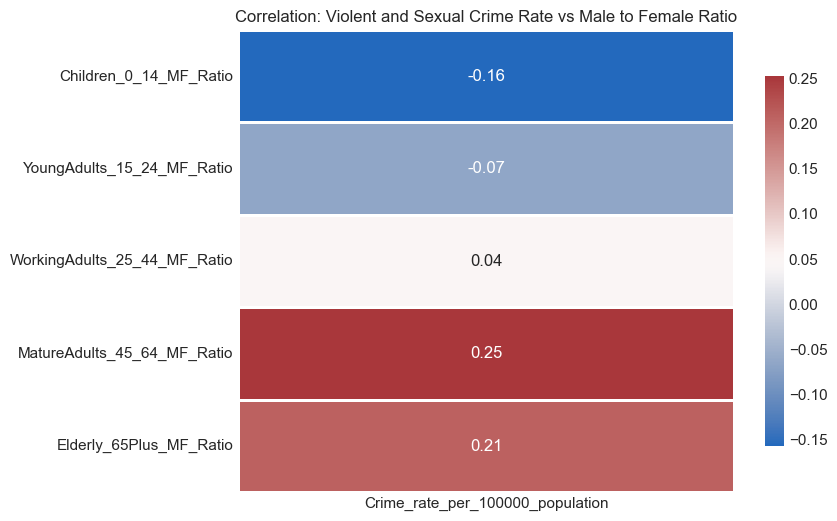

In [432]:
df_mean_corr= df_final[df_final['Indicator'] == 'Violent and Sexual'].groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

data_unique = df_final.drop_duplicates(subset=["Country", "Year"])

# Merge the datasets for Violent and Sexual
df_factors_merged = pd.merge(
    df_mean_corr, 
    data_unique[['Country', 'Year', 
                 'YoungAdults_15_24_MF_Ratio',
                 'Children_0_14_MF_Ratio', 
                 'WorkingAdults_25_44_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio', 
                 'Elderly_65Plus_MF_Ratio','Male_Female_Ratio']],
    on=['Country', 'Year']
)

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = df_factors_merged[['Crime_rate_per_100000_population', 
                                      'Children_0_14_MF_Ratio', 
                                      'YoungAdults_15_24_MF_Ratio', 
                                      'WorkingAdults_25_44_MF_Ratio',
                                      'MatureAdults_45_64_MF_Ratio', 
                                      'Elderly_65Plus_MF_Ratio',]].corr()

corr_matrix.iloc[1:,0:1]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.iloc[1:,0:1], 
                annot=True,                
    fmt=".2f",                 
    cmap="vlag",               
    linewidths=1,              
    linecolor='white',         
    cbar_kws={'shrink': 0.8}   
)

plt.title("Correlation: Violent and Sexual Crime Rate vs Male to Female Ratio")

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')

plt.show()

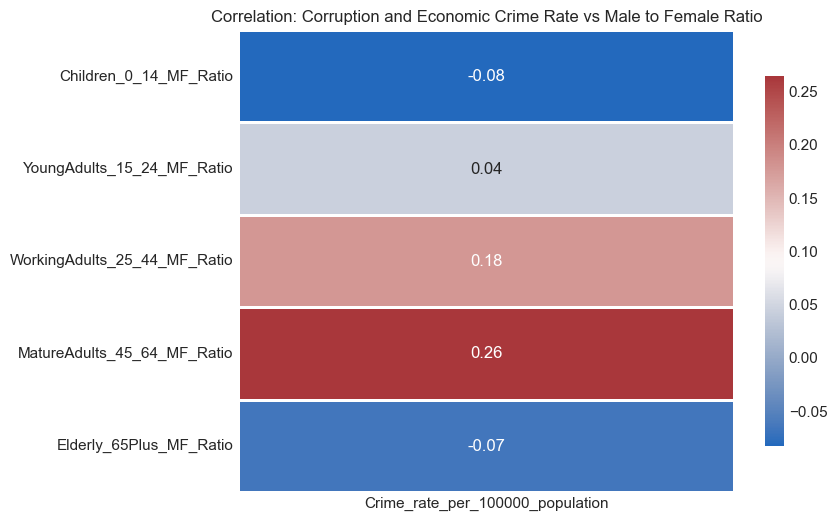

In [433]:
df_mean_corr= df_final[df_final['Indicator'] == 'Corruption and Economic'].groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

data_unique = df_final.drop_duplicates(subset=["Country", "Year"])

# Merge the datasets for Violent and Sexual
df_factors_merged = pd.merge(
    df_mean_corr, 
    data_unique[['Country', 'Year', 
                 'YoungAdults_15_24_MF_Ratio',
                 'Children_0_14_MF_Ratio', 
                 'WorkingAdults_25_44_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio', 
                 'Elderly_65Plus_MF_Ratio']],
    on=['Country', 'Year']
)

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = df_factors_merged[['Crime_rate_per_100000_population', 
                                      'Children_0_14_MF_Ratio', 
                                      'YoungAdults_15_24_MF_Ratio', 
                                      'WorkingAdults_25_44_MF_Ratio',
                                      'MatureAdults_45_64_MF_Ratio', 
                                      'Elderly_65Plus_MF_Ratio',]].corr()

corr_matrix.iloc[1:,0:1]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.iloc[1:,0:1],
                annot=True,                
    fmt=".2f",                
    cmap="vlag",              
    linewidths=1,              
    linecolor='white',         
    cbar_kws={'shrink': 0.8}   
)

plt.title("Correlation: Corruption and Economic Crime Rate vs Male to Female Ratio")

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')

plt.show()

In general, the correlation between the male-to-female ratio and crime rates is very weak based on the available data, with only 0.089. But this is not the whole story. If we break down the male-to-female ratio by age groups and crime types, on the first chart (violent and sexual crimes) and in the second (corruption and economic crimes), no significant results are observed. However, one trend catches attention: there is a moderate positive correlation between male-to-female ratio and the age group from 45 to 64. This holds true in both crime categories.

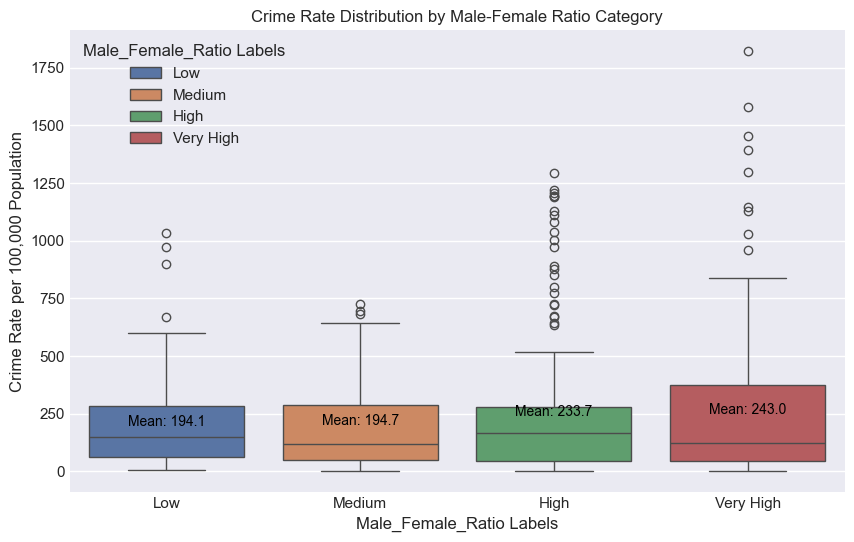

In [434]:
df_mean_corr= df_final.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

# Drop duplicates for YoungAdults_15_24_MF_Ratio to keep only unique values per year
data_unique = df_final.drop_duplicates(subset=["Country", "Year"])

# Merge the datasets for Violent and Sexual
df_factors_merged = pd.merge(
    df_mean_corr, 
    data_unique[['Country', 'Year', 
                 'YoungAdults_15_24_MF_Ratio',
                 'Children_0_14_MF_Ratio', 
                 'WorkingAdults_25_44_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio', 
                 'Elderly_65Plus_MF_Ratio','Male_Female_Ratio']],
    on=['Country', 'Year']
)

# Create bins for one of the ratios (e.g., YoungAdults_15_24_MF_Ratio)
df_factors_merged['Male_Female_Ratio Labels'] = pd.cut(df_factors_merged['Male_Female_Ratio'], bins = [0.8447, 0.9402, 0.9682, 0.9877, 1.0986]
, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Male_Female_Ratio Labels', 
    y='Crime_rate_per_100000_population', 
    hue="Male_Female_Ratio Labels",
    data=df_factors_merged

)

# Add mean values as annotations
mean_values = df_factors_merged.groupby('Male_Female_Ratio Labels')['Crime_rate_per_100000_population'].mean()
for i, mean_val in enumerate(mean_values):
    plt.text(i, mean_val + 5, f'Mean: {mean_val:.1f}', ha='center', fontsize=10, color='black')

plt.title("Crime Rate Distribution by Male-Female Ratio Category")
plt.ylabel("Crime Rate per 100,000 Population")
 
# plt.savefig("plot.png", dpi=300, bbox_inches='tight')

plt.show()



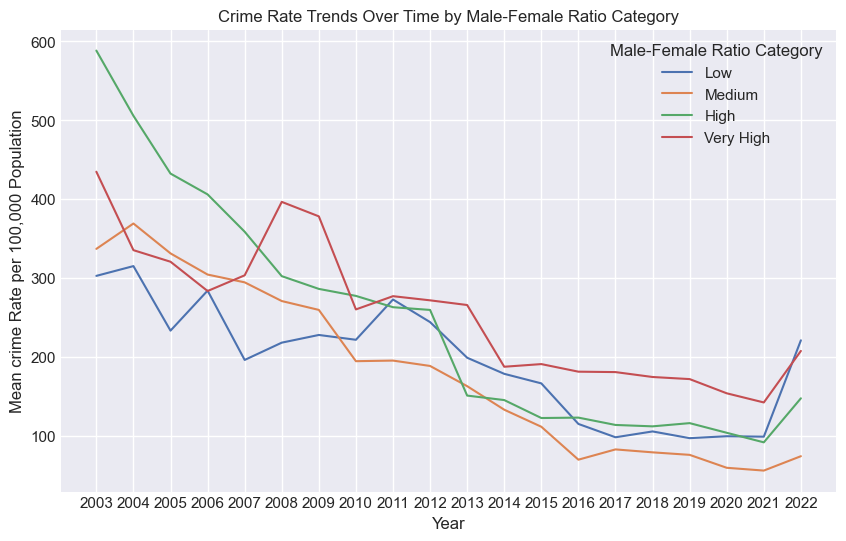

In [435]:
df_mean_corr= df_final.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

data_unique = df_final.drop_duplicates(subset=["Country", "Year"])

# Merge the datasets for Violent and Sexual
df_factors_merged = pd.merge(
    df_mean_corr, 
    data_unique[['Country', 'Year', 
                 'YoungAdults_15_24_MF_Ratio',
                 'Children_0_14_MF_Ratio', 
                 'WorkingAdults_25_44_MF_Ratio',
                 'MatureAdults_45_64_MF_Ratio', 
                 'Elderly_65Plus_MF_Ratio','Male_Female_Ratio']],
    on=['Country', 'Year']
)

# Create bins for one of the ratios
df_factors_merged['Male_Female_Ratio Labels'] = pd.cut(df_factors_merged['Male_Female_Ratio'], bins = [0.8447, 0.9402, 0.9682, 0.9877, 1.0986]
, labels=['Low', 'Medium', 'High', 'Very High'])


plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Year', 
    y='Crime_rate_per_100000_population', 
    hue='Male_Female_Ratio Labels', 
    data=df_factors_merged,
    errorbar=None  # Removes the shaded area
)
plt.title("Crime Rate Trends Over Time by Male-Female Ratio Category")
plt.xlabel("Year")
plt.ylabel("Mean crime Rate per 100,000 Population")
plt.legend(title="Male-Female Ratio Category")
plt.xticks(ticks=years_all["Year"], labels=years_all["Year"])

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')

plt.show()


Looking again at the extreme ratio we uncovered earlier. Interestingly, if we divide the male-to-female ratio into four categories based on statistical characteristics. Low (between 0.8447 and 0.9402), Medium (between 0.9402 and 0.9682), High (between 0.9682 and 0.9877), and Very High (between 0.9877 and 1.0986) we uncover some striking findings! 

The correlation remains weak, and at best moderate in certain cases, but the average crime rate is noticeably higher in some categories.

The observations across years and countries appear unpredictable (outliers with remarkably high crime rate) when male to female ratio is higher.

This suggests that a high male-to-female ratio might not directly affect crime rates, however, in the presence of other contributing factors, this ratio could create an environment of instability or chaos

However, to verify if this holds true, keeping in mind that we observed earlier that the male-to-female ratio for children may skew the results as it tends to be on the higher end, we divide the male-to-female ratio by age group into four categories, relevant to the distribution of each age group's ratios. This will minimize the chance that one group's natural skewness will dominate the results.

Children_0_14_MF_Ratio : [1.0069770663732172, 1.045111040648757, 1.0522539062172371, 1.0580602271826005, 1.1549865309668215]
YoungAdults_15_24_MF_Ratio : [0.9001397626144043, 1.0317805334262449, 1.0446430647619085, 1.0563734099258044, 1.2130589915710195]
WorkingAdults_25_44_MF_Ratio : [0.8060480531121179, 0.9845322593500649, 1.0120458789252706, 1.0367479670254285, 1.141666511784744]
MatureAdults_45_64_MF_Ratio : [0.7357001592248095, 0.9106214000016882, 0.9537371313259715, 0.9960632519219357, 1.171117282893288]
Elderly_65Plus_MF_Ratio : [0.4675477524392175, 0.6822906605006234, 0.7516445419100437, 0.8132908142634749, 0.9599787501626262]


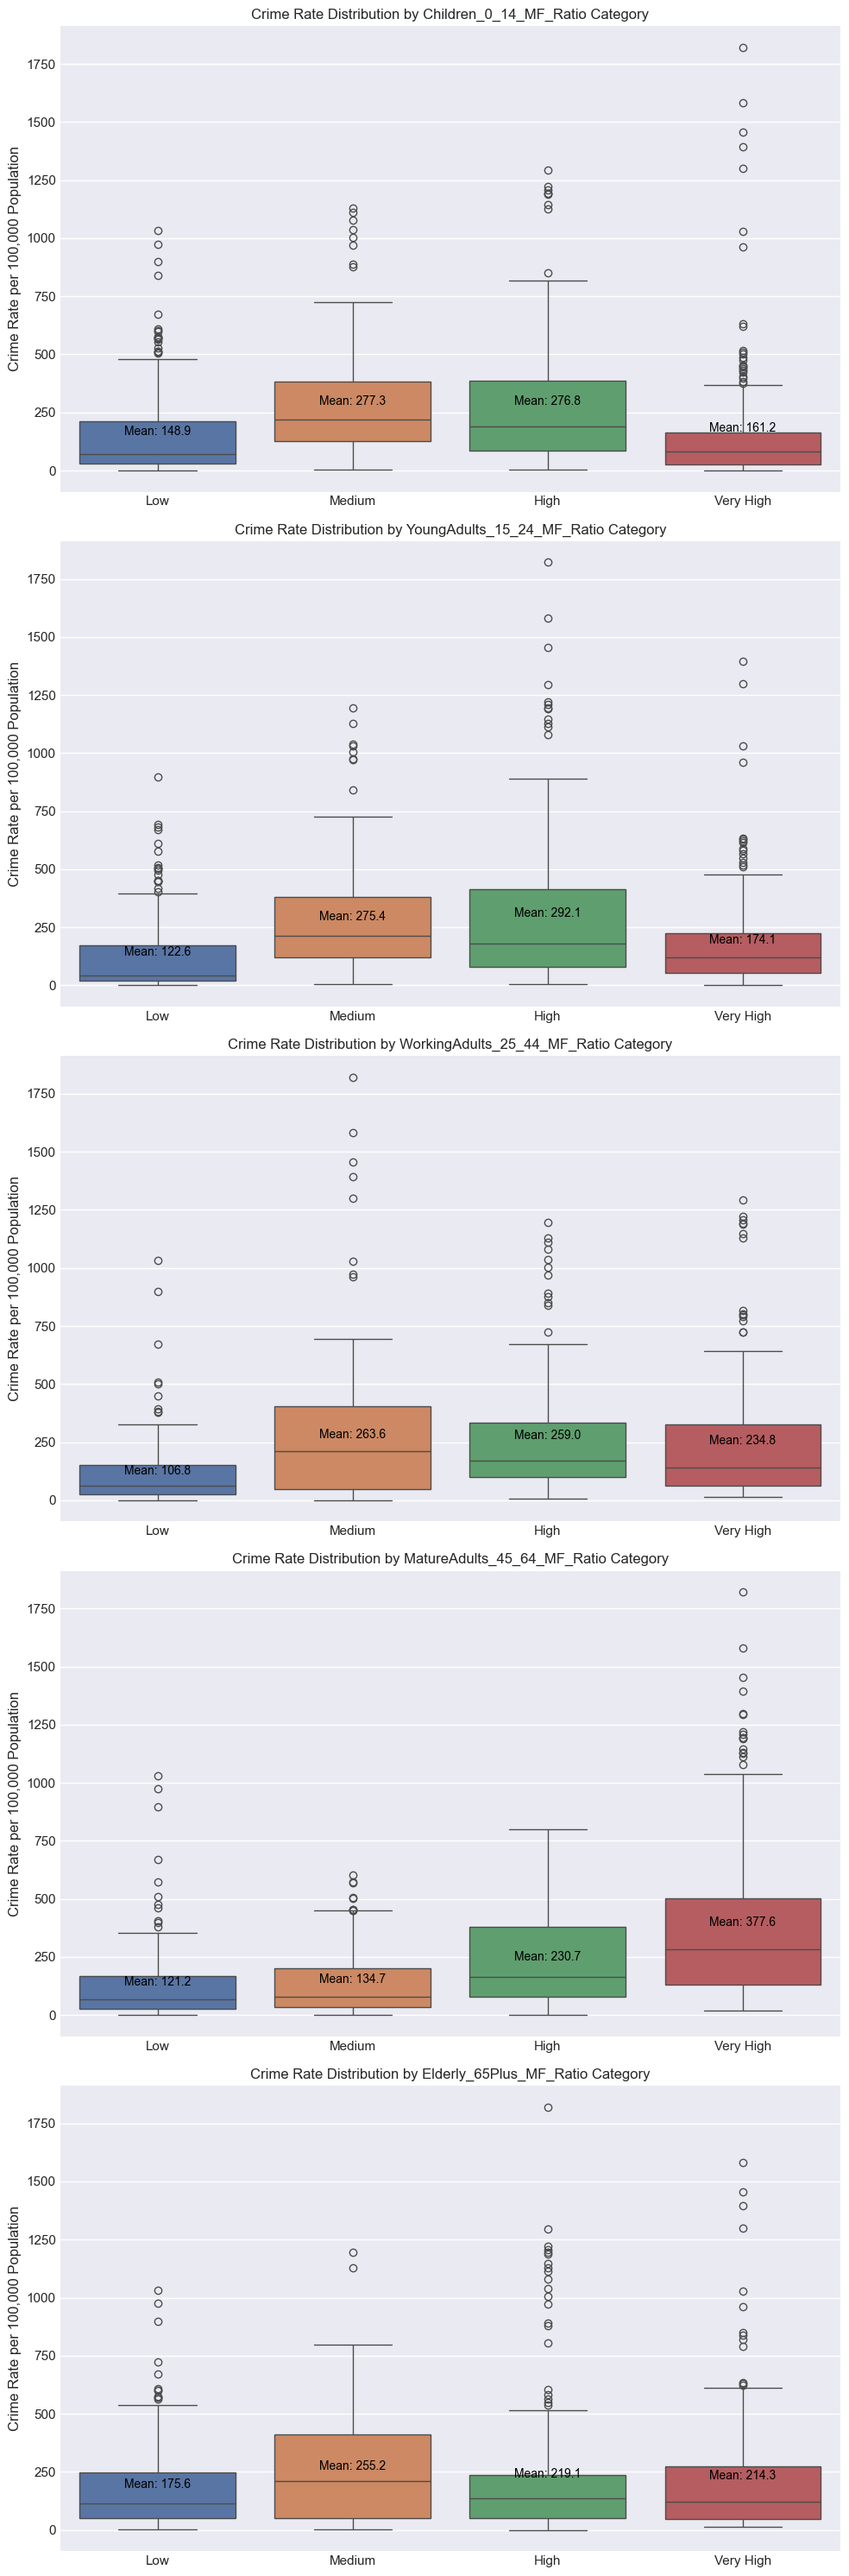

In [436]:
columns_to_plot = [
    'Children_0_14_MF_Ratio',
      'YoungAdults_15_24_MF_Ratio',
     'WorkingAdults_25_44_MF_Ratio',
     'MatureAdults_45_64_MF_Ratio',
    'Elderly_65Plus_MF_Ratio',
]

# Create subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 6 * len(columns_to_plot)))

for i, col in enumerate(columns_to_plot):
    # Calculate dynamic bins based on the column's statistical distribution
    col_stats = df_factors_merged[col].describe()
    bins = [
        col_stats['min'],
        col_stats['25%'],  # First quartile
        col_stats['50%'],  # Median
        col_stats['75%'],  # Third quartile
        col_stats['max'],
    ]
    labels = ['Low', 'Medium', 'High', 'Very High']

    print(f"{col} : {bins}")
    
    # Create bins for the current column
    df_factors_merged[f'{col} Labels'] = pd.cut(df_factors_merged[col], bins=bins, labels=labels, include_lowest=True)
    
    # Create the boxplot with dynamic bins
    boxplot = sns.boxplot(
        ax=axes[i],
        x=f'{col} Labels',
        y='Crime_rate_per_100000_population',
        data=df_factors_merged,
        hue=f'{col} Labels',  # Add hue to apply Seaborn's color palette automatically
        palette="deep"  # "Dark2" palette is darker compared to "Set2" or "Set3"
    )
    
    # Calculate and annotate mean values
    mean_values = df_factors_merged.groupby(f'{col} Labels')['Crime_rate_per_100000_population'].mean()
    
    # Get the colors from the boxplot
    plot_colors = [patch.get_facecolor() for patch in boxplot.patches]
    
    for j, mean_val in enumerate(mean_values):
        # Ensure mean_val is finite and within the visible range of the plot
        if pd.notna(mean_val):  # Check if mean is not NaN
            # Annotate the mean value using the corresponding color from the boxplot
            axes[i].text(j, mean_val + 5, f'Mean: {mean_val:.1f}', ha='center', fontsize=10, color='black')
    
    axes[i].set_title(f"Crime Rate Distribution by {col} Category")
    axes[i].set_xlabel(None)
    axes[i].set_ylabel("Crime Rate per 100,000 Population")

plt.tight_layout()

plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.show()

In [437]:
# Perform ANOVA for each age group category and compare the crime rates
for col in columns_to_plot:
    col_labels = f'{col} Labels'
    
    group_data = [df_factors_merged[df_factors_merged[col_labels] == label]['Crime_rate_per_100000_population'] for label in labels]
    
    # Perform the ANOVA test
    f_stat, p_value = stats.f_oneway(*group_data)
    
    print(f"ANOVA results for {col}:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
    
    # Interpretation of the results
    if p_value < 0.05:
        print("There is a statistically significant difference between the categories.\n")
    else:
        print("There is no statistically significant difference between the categories.\n")


ANOVA results for Children_0_14_MF_Ratio:
F-statistic: 21.7124, p-value: 0.0000
There is a statistically significant difference between the categories.

ANOVA results for YoungAdults_15_24_MF_Ratio:
F-statistic: 29.3895, p-value: 0.0000
There is a statistically significant difference between the categories.

ANOVA results for WorkingAdults_25_44_MF_Ratio:
F-statistic: 23.9688, p-value: 0.0000
There is a statistically significant difference between the categories.

ANOVA results for MatureAdults_45_64_MF_Ratio:
F-statistic: 69.6548, p-value: 0.0000
There is a statistically significant difference between the categories.

ANOVA results for Elderly_65Plus_MF_Ratio:
F-statistic: 4.3784, p-value: 0.0045
There is a statistically significant difference between the categories.



In [438]:
# Perform Tukey's HSD test for each column (to determine which pairs of categories are significantly different)
for col in columns_to_plot:
    tukey_result = pairwise_tukeyhsd(
        df_factors_merged['Crime_rate_per_100000_population'], 
        df_factors_merged[f'{col} Labels'],
        alpha=0.05
    )
    print(f"Tukey's HSD results for {col}:")
    print(tukey_result)

Tukey's HSD results for Children_0_14_MF_Ratio:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2   meandiff p-adj    lower    upper   reject
-----------------------------------------------------------
  High       Low -127.9511    0.0 -183.1145 -72.7877   True
  High    Medium    0.4596    1.0  -54.7038   55.623  False
  High Very High -115.6045    0.0 -170.7679 -60.4411   True
   Low    Medium  128.4107    0.0   73.2473 183.5741   True
   Low Very High   12.3466 0.9393  -42.8168    67.51  False
Medium Very High -116.0641    0.0 -171.2275 -60.9007   True
-----------------------------------------------------------
Tukey's HSD results for YoungAdults_15_24_MF_Ratio:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2   meandiff p-adj    lower    upper   reject
-----------------------------------------------------------
  High       Low -169.4672    0.0 -224.0043  -114.93   True
  High    Medium  -16.6663 0.8606  -71.2034  37.8709  False


Male-to-Female Ratio and Crime Rates

For these two age groups, the distribution almost resembles a normal curve. 

- When the male-to-female ratio is close to equal, the mean crime rates show a significant increase.
- While crime rates remain relatively high in the 'very high' category, this trend is particularly noticeable for the 14-24 age group. 

For group age (25 – 44) high ratios lead to a significant increase in crime rates compared to low ratios

For the age group (45-64), the very high ratios show the most significant effect on crime rates, highlighting this group when considering the male-to-female ratio, particularly, as we observed earlier, its positive correlation is consistent with 'violent and sexual' (0.25) crimes and 'corruption and economic' crimes (0.26)

Also, to confirm whether the mean crime rates differ across different age groups based on their male-to-female ratio, ANOVA and Tukey's HSD tests were conducted

Based on the analysis and the above charts, the strongest effect of male-to-female ratio on crime rates is observed in mature adults (45 – 64), where very high ratios lead to the most significant increase in crime rates. For children (0-14) and young adults (15 - 24), both high and very high ratios contribute to increased crime rates. Working adults (25 – 44) also show higher crime rates with high ratios, In the elderly (65+) In the elderly (65+), there is no clear relationship between the ratio and crime rates.


Correlation between Male-Female Ratio and Crime Rate: 0.09


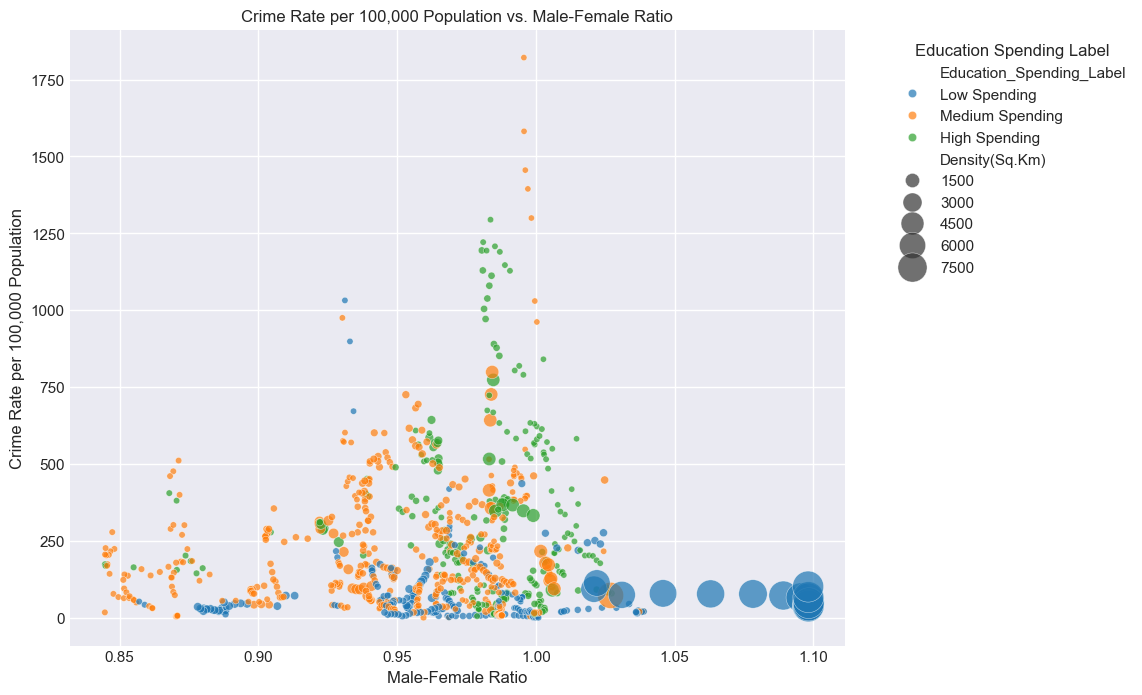

In [439]:
aggregated_df = df_final.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

mf_df = df_final[['Country', 'Year', 'Male_Female_Ratio', 'Density(Sq.Km)', 'Education_Spending_Label']].drop_duplicates()

merged_df = pd.merge(aggregated_df, mf_df, on=['Country', 'Year'])

correlation = merged_df['Male_Female_Ratio'].corr(merged_df['Crime_rate_per_100000_population'])

print(f"Correlation between Male-Female Ratio and Crime Rate: {correlation:.2f}")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='Male_Female_Ratio', 
                          y='Crime_rate_per_100000_population', 
                          hue='Education_Spending_Label',  
                          size='Density(Sq.Km)',           
                          sizes=(20, 500),                
                          data=merged_df,
                          alpha=0.7,                     
                          palette='tab10')               


plt.title('Crime Rate per 100,000 Population vs. Male-Female Ratio')
plt.xlabel('Male-Female Ratio')
plt.ylabel('Crime Rate per 100,000 Population')
plt.grid(True)

# Show legend for hue and size
plt.legend(title='Education Spending Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.savefig("plot.png", dpi=300, bbox_inches='tight')


plt.show()


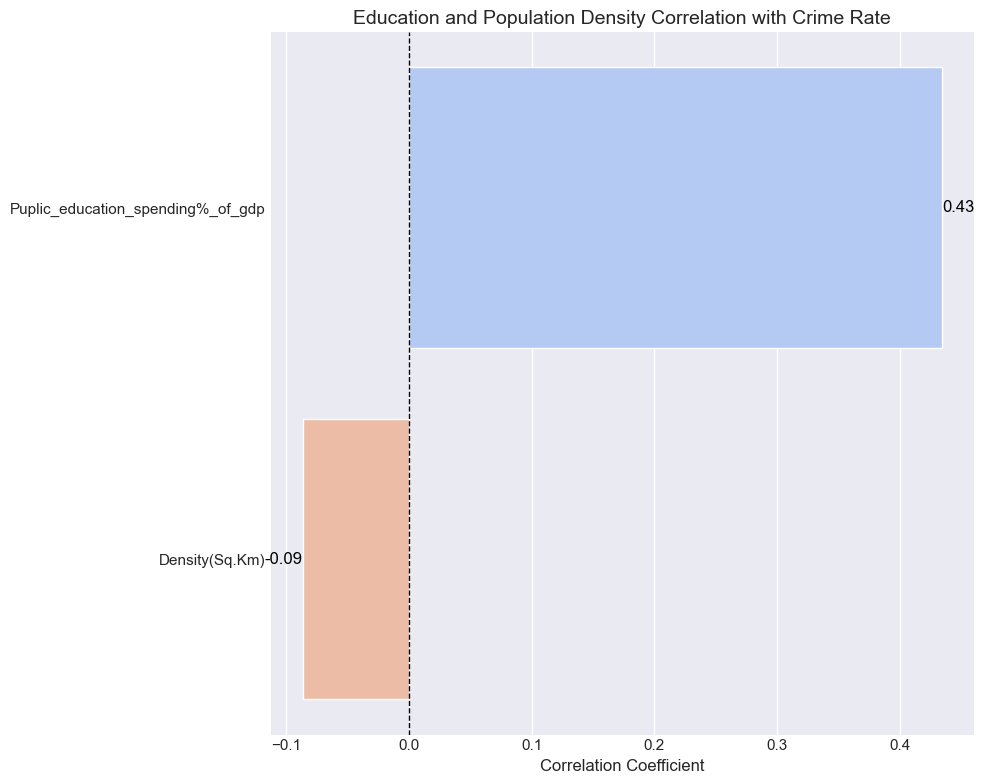

In [440]:
df_mean_corr= df_final.groupby(['Country', 'Year'], as_index=False)['Crime_rate_per_100000_population'].mean()

data_unique = df_final.drop_duplicates(subset=["Country", "Year"])

# Merge the datasets for Violent and Sexual
df_factors_merged = pd.merge(
    df_mean_corr, 
    data_unique[['Country', 'Year', 
                 'Density(Sq.Km)',
                 'Puplic_education_spending%_of_gdp']], on=['Country', 'Year'])

# Calculate the correlation for Crime Rate against each age group ratio
corr_matrix = df_factors_merged[['Crime_rate_per_100000_population', 
                                'Density(Sq.Km)',
                                'Puplic_education_spending%_of_gdp']].corr()



correlations = corr_matrix.iloc[1:,0:1]

# Calculate correlations
correlations = corr_matrix.iloc[1:, 0]
correlations_sorted = correlations.sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(10, 8))
sns.barplot(
    x=correlations_sorted.values,
    y=correlations_sorted.index,
    palette="coolwarm"
)

for i, value in enumerate(correlations_sorted.values):
    plt.text(
        value,         # X-coordinate
        i,             # Y-coordinate
        f"{value:.2f}",  # Label with two decimal places
        va='center',   # Vertical alignment
        ha='right' if value < 0 else 'left',  # Alignment based on value
        color="black",
        fontsize=12,
    )

plt.title("Education and Population Density Correlation with Crime Rate", fontsize=14)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel(None)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()

# plt.savefig("plot.png", dpi=300, bbox_inches='tight', pad_inches=0.5)

plt.show()


Getting back to the role of public spending on education and population density, the data tells a different story from what we initially suspected, while density does not correlate with the crime rate, unexpectedly, there is a moderate positive correlation between public spending on education and crime rates, with a coefficient of 0.43.

Important Considerations

It’s important to remind ourselves that correlation does not imply causation. So, why might this be happening? A few potential reasons include:

1. **Ineffective Resource Management**: Countries that "need" to spend more on education may not be utilizing these resources effectively. This could indicate poor management, which might lead to higher crime rates as a consequence.
   
2. **Better Reporting Systems**: Countries that allocate more funds to education may also have more structured systems and efficient crime reporting mechanisms. This could lead to a higher recorded crime rate, which may explain the observed correlation in the data.


<div style="text-align: center; font-weight: bold;font-size: 22px">Conclusion</div>

Based on the available data covering 51 countries from 2003 to 2023, the overall correlation between the male-to-female ratio and crime rates is hardly noticeable (0.089). However, in specific cases, such as certain countries, age groups, and specific male-to-female ratio categories, a moderate correlation emerges. This inconsistency suggests that while the male-to-female ratio is not a significant factor on its own, its interaction with other variables can influence crime rates remarkably.

Countries with a male-to-female ratio equal to 1 and higher should closely monitor and address social, economic, and legal changes that may amplify the impact of this demographic balance on crime rates.

Contrary to intuitive assumptions, the data reveals no significant correlation between population density and crime rates. Surprisingly, there is a moderate positive correlation (0.43) between public spending on education (as a percentage of GDP) and crime rates. This unexpected finding requires further investigation. Potential explanations include ineffective resource management in education or more efficient crime reporting systems in countries with higher education budgets.

Additionally, the data confirms that the overall female population is consistently higher than the male population, with both moving in parallel over the years.

Finally, further targeted studies are recommended to gain deeper insights into these relationships. These studies should focus on predefined entities (e.g., companies, organizations, and cities) with clear definitions of crime types and reporting criteria. A shift toward analyzing densely populated cities instead of entire countries may provide more actionable findings.
